* https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
* https://medium.com/geekculture/how-to-do-exploratory-data-analysis-eda-of-the-telco-customer-churn-dataset-fc8edba13c6e
* https://www.kaggle.com/code/priyanshu00/telecom-churn-prediction
* https://github.com/manavpatel1092/EDA-of-Telecom-Churn-rate/blob/master/DS%20640%20Assignment%201.ipynb
* https://www.kaggle.com/code/gauravduttakiit/telecom-customer-churn-eda/notebook#Load-the-data
* https://www.analyticsvidhya.com/blog/2022/01/churn-analysis-of-a-telecom-company/
* https://towardsdatascience.com/data-analysis-project-telco-customer-churn-fe5c0144e708
* https://github.com/YuehHanChen/Telco_Customer_Churn_Analysis/blob/master/Telco_Customer_Churn_Analysis.ipynb
    

# <font color=blue>Reading the data</font>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [212]:
# Specify the path to your CSV file
csv_file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# <font color=blue>Overview of the data</font>

In [7]:
def getPercentage(series):
    return series * 100 / df.shape[0]
    # return round(series * 100 / df.shape[0], 2)

In [8]:
print(f"Dataset comprises of {df.shape[0]} observations and {df.shape[1]} characteristics.")

Dataset comprises of 7043 observations and 21 characteristics.


In [9]:
print(f"Columns in the dataset:\n{df.columns.values}")
# df.columns

Columns in the dataset:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [10]:
print(f"Data types of columns in the dataset:\n{df.dtypes}")

Data types of columns in the dataset:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
print(f"Null value count:\n{df.isnull().sum()}")
# df.isna().sum().sum()

Null value count:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [12]:
print(f"NA value count:\n{df.isna().sum()}")

NA value count:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


###  Inference
* There are no null or NA values in the dataset
<br><br>

In [13]:
# If missing values exist,

# Percentage of missing values
#round( df.isna().sum() * 10 / df.shape[0]), 2).sort_values()

#Removing missing values 
#telco_data.dropna(how = 'any', inplace = True)
#Since the proportion of records compared to the total dataset is very low i.e. 0.15%, it is better to remove them from the dataset.

# Imputing
#df.fillna(df.mean()) # Filling the NA with mean of the datafram

In [14]:
# Data types, null values can also be understood with info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Inference
1. TotalCharges is taken as categorical variable and needs to converted to numerical
2. SeniorCitizen is assumed to be numerical and must be converted to categorical

In [227]:
# Conversion of SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
# df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [16]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [17]:
df[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Inference
1. TotalCharges has 11 observations with value " ". These are indirect null values/missing values and cannot be converted to numerical.



In [228]:
# Replacing missing values in TotalCharges with (tenure * MonthlyCharges)
df['TotalCharges'] = np.where(df['TotalCharges']== ' ', df['MonthlyCharges'] * df['tenure'], df['TotalCharges'])
# Test
df[df.tenure * df.MonthlyCharges != df.TotalCharges].shape

# Replace tenure 0 with mean since there are no extreme values
#df['tenure']=df['tenure'].replace(0,data['tenure'].mean())

(7032, 20)

In [229]:
# Conversion of TotalCharges to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
# Test
df.TotalCharges.dtype

dtype('float64')

In [20]:
# When you try to convert categorical to numeric and missing values are present, it throws an error
# To overcome that, use errors="coerce" and the missing values become null and can be handled after
# pd.to_numeric(df.TotalCharges, errors='coerce')

# To check which indexes have these 11 missing values, the code is as follows.
#df.loc[telco_data ['TotalCharges'].isnull() == True]

In [21]:
# Missing Value Treatment

#Since the proportion of records compared to the total dataset is very low
# i.e. 0.15%, it is better to remove them from the dataset.

#Removing missing values 
#df.dropna(how = 'any', inplace = True)

In [22]:
# Plotting percentage of missing value
"""
missing = pd.DataFrame((telecom.isnull().sum())*100/telecom.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()"""

'\nmissing = pd.DataFrame((telecom.isnull().sum())*100/telecom.shape[0]).reset_index()\nplt.figure(figsize=(16,5))\nax = sns.pointplot(\'index\',0,data=missing)\nplt.xticks(rotation =90,fontsize =7)\nplt.title("Percentage of Missing values")\nplt.ylabel("PERCENTAGE")\nplt.show()'

In [23]:
# Check distribution of variable to understand how to impute missing values
# We can observe that the range is huge. We can't go with either mean or median as they can skew/distort the whole scenario.
# Let's check data related variables of 8th month to decide on filling up the missing values
"""ax=sns.distplot(highvalue['arpu_3g_8'],kde=False)
ax.set_yscale('log')
plt.show()

# We can infer that the customers hasn't bought the data at all in 8th month.
# Let's fill the gap as 0"""

"ax=sns.distplot(highvalue['arpu_3g_8'],kde=False)\nax.set_yscale('log')\nplt.show()\n\n# We can infer that the customers hasn't bought the data at all in 8th month.\n# Let's fill the gap as 0"

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Descriptive Analysis of the dataset
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [114]:
df.describe(include=['object', 'bool'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


#### Insights
* We can verify that there are no missing values as the count is same for all columns
* There is significant difference between mean and median value of MonthlyCharges, which suggests that there are outliers
* 75% of customers have a tenure of fewer than 55 months.
* Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month.
* There exist customers who have churned in less than a month. What is the percentage of this customers will be computed further.





In [26]:
# Print unique values
print(f'Unique values:\n{df.nunique()}')

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [27]:
print(f"Number of duplicates in dataset = {df[df.duplicated()].shape[0]}")

Number of duplicates in dataset = 0


In [ ]:
def find_duplicates(df):
    # Identify duplicate rows based on all columns
    duplicates = df[df.duplicated()]

    return duplicates
# Provide the column name to check for duplicates
column_to_check = 'column_name'  # Replace with the actual column name

# Call the function and print the duplicate entries
duplicate_entries = find_duplicates(df, column_to_check)
if not duplicate_entries.empty:
    print("Duplicate entries found:")
    print(duplicate_entries)
else:
    print("No duplicate entries found.")

# <font color="blue">EDA</font>

In [230]:
# Classify numercial and categorical columns
num_cols = []
cat_cols =[]

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num_cols.append(col)
        
    elif pd.api.types.is_object_dtype(df[col]):
        cat_cols.append(col)
        
print(f"There are {len(num_cols)} Numerical Columns as follows:\n{num_cols}")
print(f"\nThere are {len(cat_cols)} Categorical Columns as follows:\n{cat_cols}")

There are 3 Numerical Columns as follows:
['tenure', 'MonthlyCharges', 'TotalCharges']

There are 17 Categorical Columns as follows:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## Univariate Analysis

### Distribution of the target variable

In [29]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

In [30]:
print(df.Churn.value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


In [31]:
print(getPercentage(df.Churn.value_counts()))

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


#### Insight on target variables
* Target variable is categorical in nature.
* Churn has two values - Yes and No
* Churn - Yes is 26.5% and Churn - No is 73.4%. The distribution of Churn shows the following things:
    * The dataset is highly imbalanced
    * There are 73.4% of loyal customers who are churning and stay with the telecom service provider instead of switching to the competitor. Hence, the percentage of loyal customer is good.
    * Due to the imbalance, standard optimization criteria or performance measures may not be as effective and would need modification.

Text(0, 0.5, 'Churn')

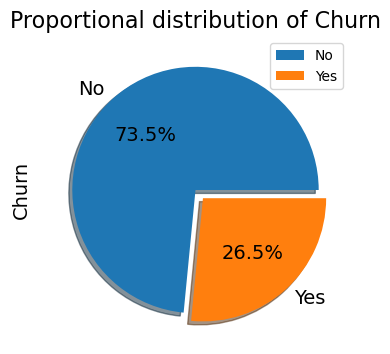

In [32]:
# Plotting the distribution of churn
# Plotting our dependent variable, y column
df['Churn'].value_counts().plot(kind='pie', legend=True, explode = [0, 0.09], autopct = "%3.1f%%", shadow = True, figsize=(4,4), fontsize=14)

plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn', fontsize=14)

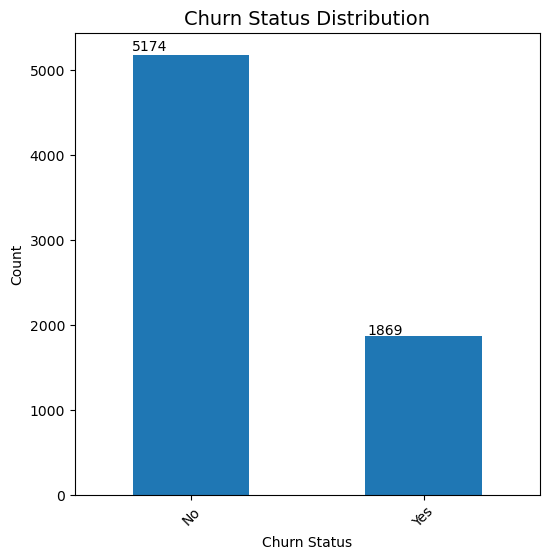

In [33]:
plt.figure(figsize=(6,6))
ax=df['Churn'].value_counts().plot(kind = 'bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
    
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.xlabel('Churn Status')
plt.title('Churn Status Distribution',fontsize=14)
plt.show()

In [ ]:
# Histogram representing the No.of people who have churned
churn_count2 = churn.groupby('Churn?').count()
plt.bar(churn_count2.index, churn_count2['Day Mins'])
plt.xlabel('Churn')
plt.ylabel('No. of People')
plt.show()

### Independent Variables

#### customerID

In [50]:
print(f"Number of duplicates in column customerID = {df[df.customerID.duplicated()].shape[0]}")

Number of duplicates in column customerID = 0


In [51]:
# Print unique values
print(f'Unique values:\n{df.customerID.nunique()}')

Unique values:
7043


#### Inference
* There are no duplicates in customerID and it has 7043 unique values, which shows that each row is unique to a single customer
* customerID feature does not add other value to insight or model building, hence we drop it
* We can infer that the customerID is an unique column, means it's not repeated multiple times.
* So we can safely ignore as it's not going to add any value for our analysis and it is highly cardinal

In [214]:
# Dropping customerid columns as it is highly cardinal
df.drop("customerID",axis=1,inplace=True)
cat_cols.remove("customerID")

#### Unique Values

In [53]:
# Function to get unique value
for col in df.columns:
    print(col)
    print(df[col].unique())
    print(f"Unique Value Count - {len(df[col].unique())}")
    print('-'*30)

gender
['Female' 'Male']
Unique Value Count - 2
------------------------------
SeniorCitizen
[0 1]
Unique Value Count - 2
------------------------------
Partner
['Yes' 'No']
Unique Value Count - 2
------------------------------
Dependents
['No' 'Yes']
Unique Value Count - 2
------------------------------
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique Value Count - 73
------------------------------
PhoneService
['No' 'Yes']
Unique Value Count - 2
------------------------------
MultipleLines
['No phone service' 'No' 'Yes']
Unique Value Count - 3
------------------------------
InternetService
['DSL' 'Fiber optic' 'No']
Unique Value Count - 3
------------------------------
OnlineSecurity
['No' 'Yes' 'No internet service']
Unique Value Count - 3
------------------------------
OnlineBackup
['Yes' 'No' 'N

#### Value counts

In [55]:
#df['customerID'].value_counts().sort_values(ascending = False)
for col in df.columns:
    print(df[col].value_counts())
    print('__________________')
    

Male      3555
Female    3488
Name: gender, dtype: int64
__________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
__________________
No     3641
Yes    3402
Name: Partner, dtype: int64
__________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
__________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
__________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
__________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
__________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
__________________
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
__________________
No                     3088
Yes                    2429
No internet service    15

#### Value Count Percentages

In [56]:
for col in df.columns:
    print(getPercentage(df[col].value_counts()))
    print('__________________')
    

Male      50.47565
Female    49.52435
Name: gender, dtype: float64
__________________
0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64
__________________
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64
__________________
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64
__________________
1     8.703677
72    5.139855
2     3.379242
3     2.839699
4     2.498935
        ...   
28    0.809314
39    0.795116
44    0.724123
36    0.709925
0     0.156183
Name: tenure, Length: 73, dtype: float64
__________________
Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64
__________________
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64
__________________
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64
__________________
No                     49.666335
Yes                    28.666761
No int

In [58]:
# Duplicates
# If any column has duplicates, we can check that here
# Since cat cols have same values, they won't provide any insight with duplicates
for col in num_cols:
    print(f"Number of duplicates in {col} = {df[df[col].duplicated()].shape[0]}")

Number of duplicates in tenure = 6970
Number of duplicates in MonthlyCharges = 5458
Number of duplicates in TotalCharges = 512


#### Describe

In [61]:
for col in df.columns:
    print(df[col].describe())
    print('-'*30)

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object
------------------------------
count     7043
unique       2
top          0
freq      5901
Name: SeniorCitizen, dtype: int64
------------------------------
count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object
------------------------------
count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object
------------------------------
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
------------------------------
count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object
------------------------------
count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object
------------------------------
count            7043
unique      

In [64]:
# Check for zeroes in the DataFrame
#zero_mask = df == 0

# Count the number of zeroes in each column
#zero_count = zero_mask.sum()

def negat_values_count(col):
    # Check for negative values in the specified column
    negat_values = df[df[col] < 0]

    # Return the rows with negative values
    return negat_values, len(negat_values)

        
for col in df.columns:
    negat_values, count = negat_values_count(col)
    if count:
        print(f"Row count with negative values in column '{col}' = {count}")
        #print(negat_values)
    else:
        print(f"No negative values found in column '{col}'")
        

No negative values found in column 'gender'
No negative values found in column 'SeniorCitizen'
No negative values found in column 'Partner'
No negative values found in column 'Dependents'
No negative values found in column 'tenure'
No negative values found in column 'PhoneService'
No negative values found in column 'MultipleLines'
No negative values found in column 'InternetService'
No negative values found in column 'OnlineSecurity'
No negative values found in column 'OnlineBackup'
No negative values found in column 'DeviceProtection'
No negative values found in column 'TechSupport'
No negative values found in column 'StreamingTV'
No negative values found in column 'StreamingMovies'
No negative values found in column 'Contract'
No negative values found in column 'PaperlessBilling'
No negative values found in column 'PaymentMethod'
No negative values found in column 'MonthlyCharges'
No negative values found in column 'TotalCharges'
No negative values found in column 'Churn'


In [3]:
def zero_value_count(col):
    # Find rows with zero values in the specified column
    zero_values = df[df[col] == 0]

    # Return the rows with zero values
    return zero_values, len(zero_values)

        
        
for col in df.columns:
    zero_values, count = zero_value_count(col)
    if count:
        print(f"Row count with zero values in column '{col}' = {count}")
        #print(zero_values)
    else:
        print(f"No zero values found in column '{col}'")
        

NameError: name 'df' is not defined

#### Insights
* The distribution of gender is almost 50% each which is in line with the global trend
* 16% are senior citizens. Compare it with global trend. The subscriptions may not be liked by senior citizen, hence not attracting them. Or they maybe no more to subscribe again
* When you look at tenure graph, we see stratign and ending more poeple join, so you recently did something nice to attract more
* Phone service - are you giving free/default. If free why 9% have not opted
* Most of additional services 50% of people have not opted for
* Month-to-month: one-year: two-year is approximately 2.5: 1: 1

In [ ]:
# Other ways to do the same analysis
df.query('PhoneService == "No"').shape

### Visualization: Distribution of variables

In [ ]:
# Visualization Function
def desc(title=None, xscale=None, yscale=None, xlabel=None, ylabel=None, xlim=None, ylim=None, xticks1=None, xticks2=None, yticks1=None, yticks2=None,legend_title=None, legend_labels=None):
    if title:
        plt.title(title);
    if xscale:
        plt.xscale(xscale);
    if yscale:
        plt.yscale(yscale);
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if xlim:
        plt.xlim(xlim);
    if ylim:
        plt.ylim(ylim);
    if xticks1:
        plt.xticks(xticks1, xticks2);
    if yticks1:
        plt.yticks(yticks1, yticks2);
    if legend_title:
        plt.legend(title=legend_title);
        if legend_labels:
            plt.legend(title=legend_title, labels=legend_labels);

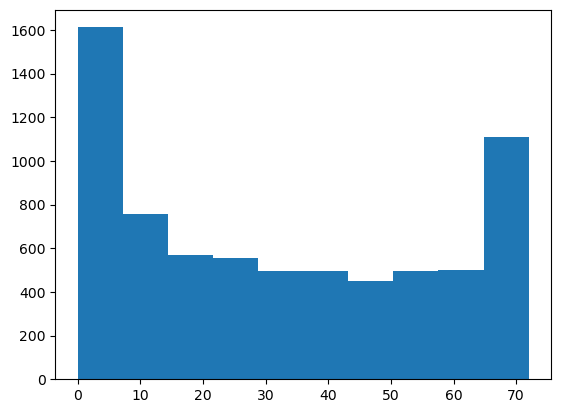

In [72]:
# show the distribution of tenure.
plt.hist(data = df, x = 'tenure');

#### Insight
* When you look at tenure graph, we see starting and ending more people join, which shows the company recently did something good to attract more

<Figure size 2000x800 with 0 Axes>

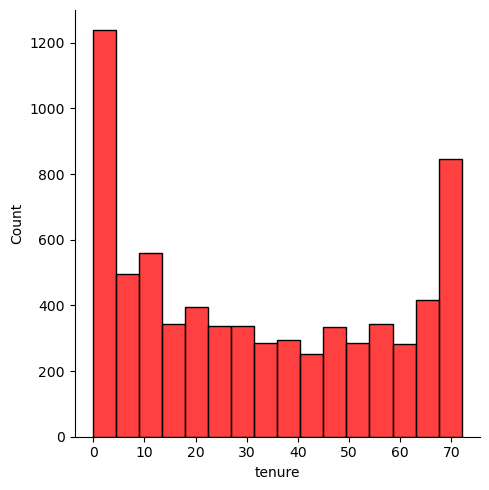

In [69]:
# Plotting tenure column with count
plt.figure(figsize=(20, 8))
sns.displot(df.tenure, color='red')
plt.show()

This is apparently not a normal distribution. And with two peaks, there are two extreme kinds of people among all customers, and I will investigate what services have kept those who stay more than 70 months the most.

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 


### To check distribution-Skewness

To check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [ ]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

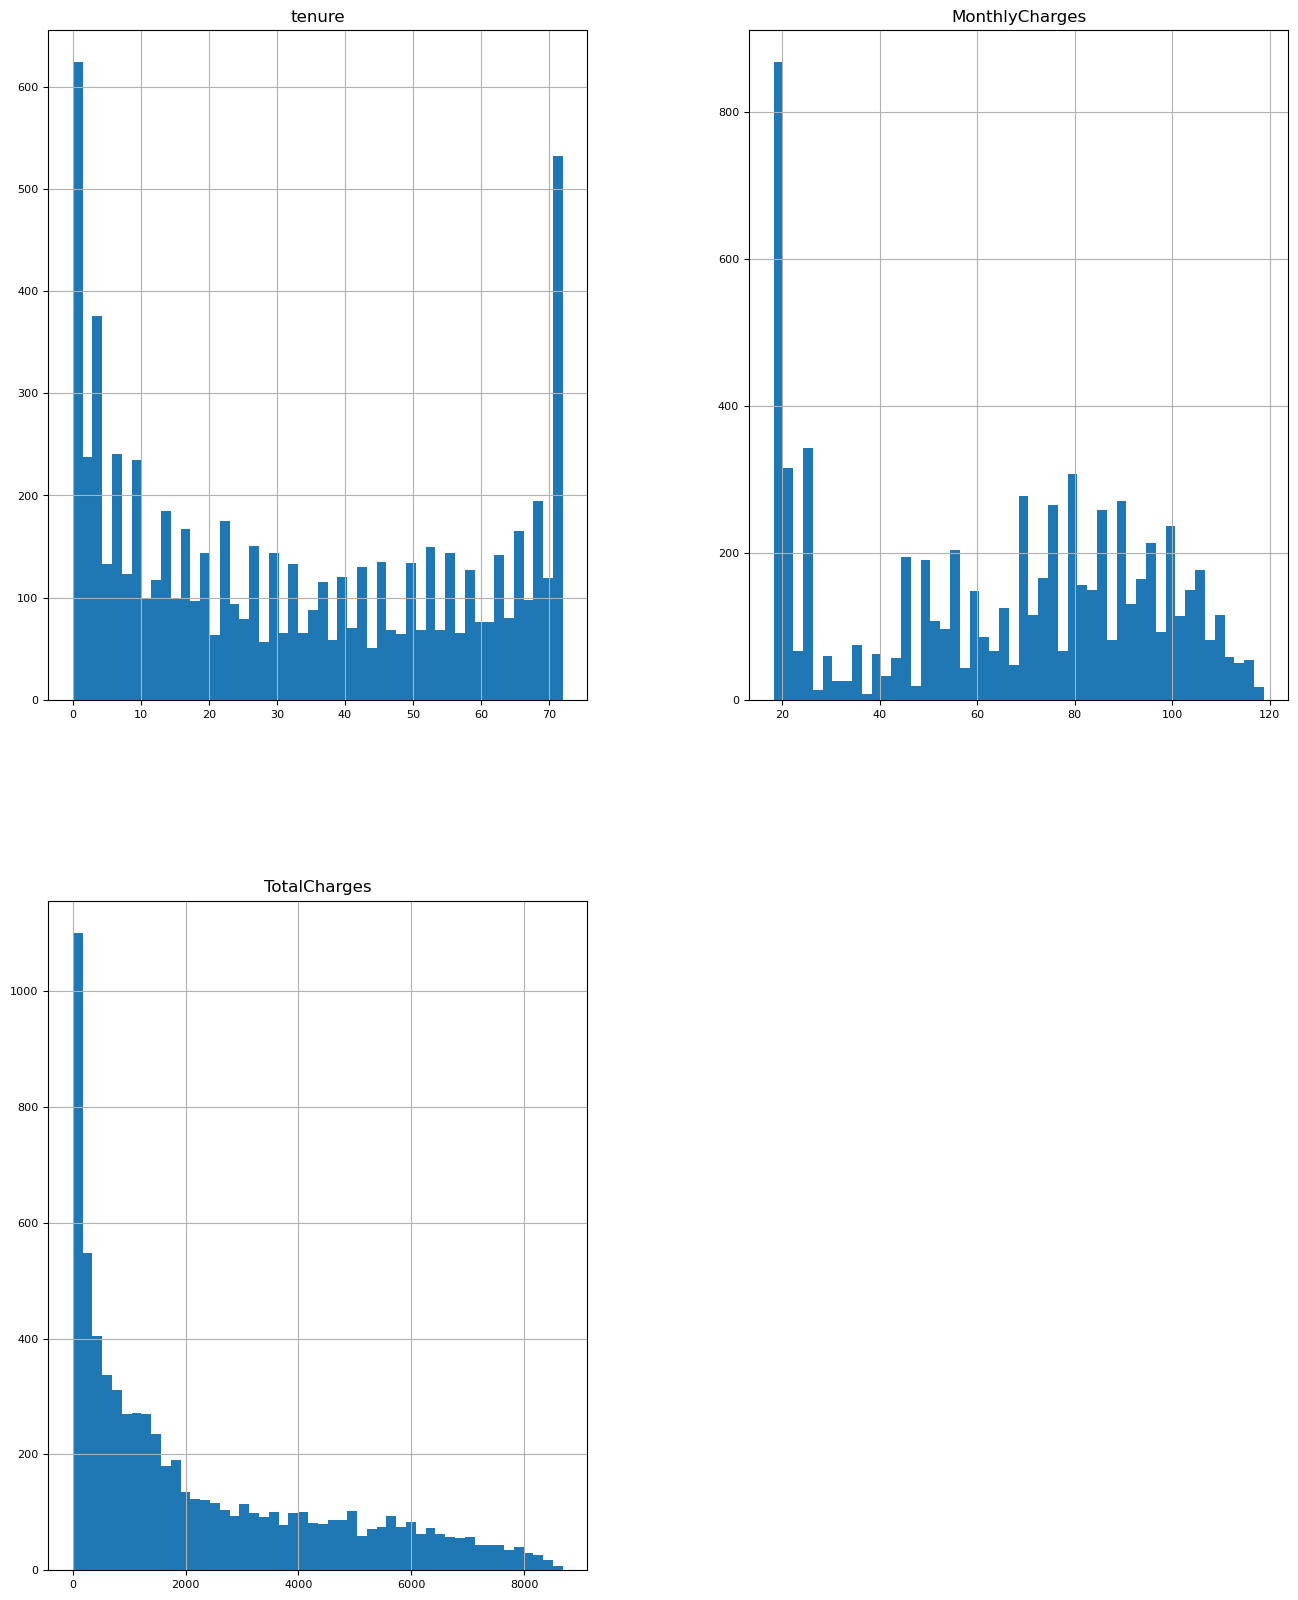

In [118]:
# Histogram for each variable
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Bivariate Analysis

### Correlation
* Numerical - Numerical column relation

In [193]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [199]:
# Tenure - Total Charges
correlation2 = df['tenure'].corr(df['TotalCharges'])

# Print the correlation coefficient
print(f"Correlation: {correlation2}")

Correlation: 0.8261783979502421


* Total Charges: It does not make sense to calculate correlation for this feature with other two as TotalCharges is derived from tenure * MonthlyCharges
* We see 0.8 correlation because of this derivation. This is a classic example that correlation doesn't necessary imply existence of a valid relation

In [198]:
# Tenure - Monthly Charges
correlation = df['tenure'].corr(df['MonthlyCharges'])

# Print the correlation coefficient
print(f"Correlation: {correlation}")

Correlation: 0.2478998562861499


* A correlation of 0.24 in a dataset indicates a weak positive linear relationship
* We can conclude that tenure and MonthlyCharges don't affect each other much

In [247]:
# Correlation Plot 
corr=df.corr()
corr.style.background_gradient().set_precision(1)

,tenure,MonthlyCharges,TotalCharges
tenure,1.0,0.2,0.8
MonthlyCharges,0.2,1.0,0.7
TotalCharges,0.8,0.7,1.0


<AxesSubplot:>

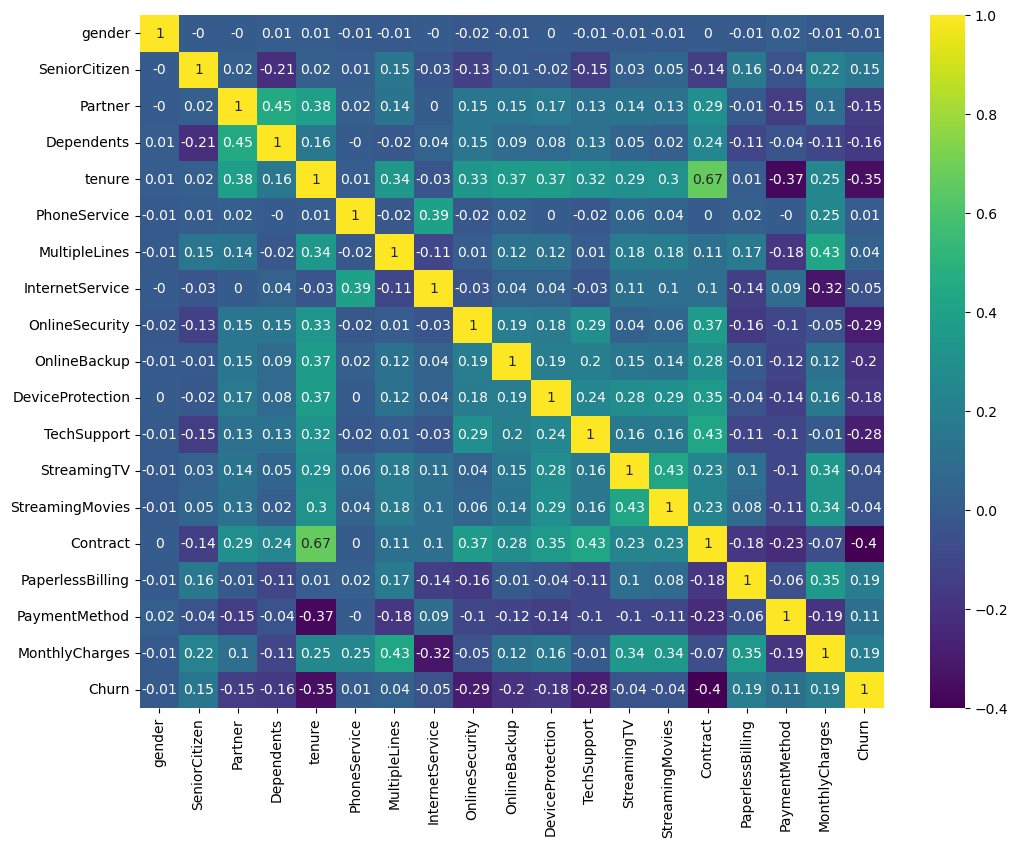

In [249]:
# Generating a heatmap plot of the correlation matrix for the label-encoded dataset
corr_mat=df_e.corr().round(2)
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,annot=True,cmap='viridis')

* If correlation is zero we can infer there is no linear relationship between these two predictors.However it is safe to drop these features in case you’re applying Linear Regression model to the dataset.

<AxesSubplot:>

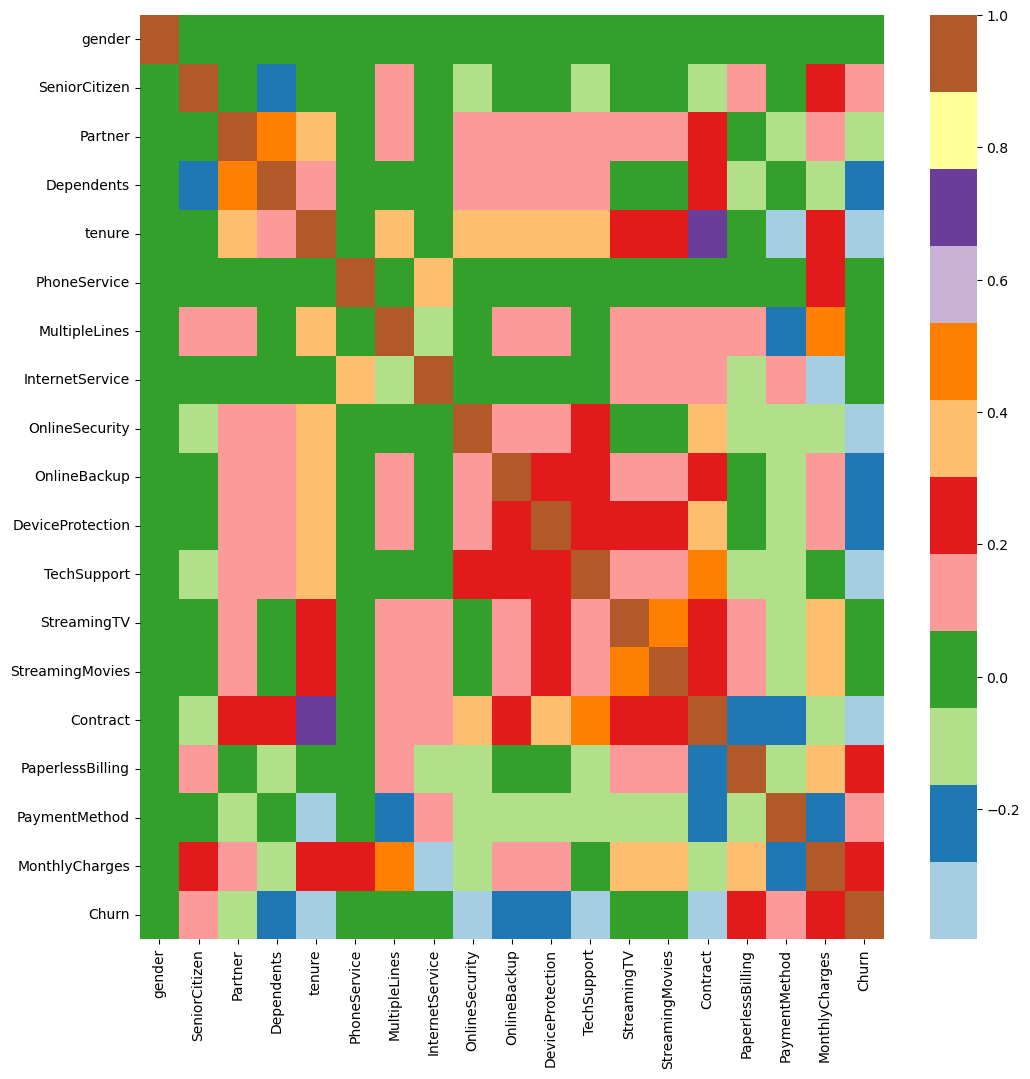

In [250]:
plt.figure(figsize=(12,12))
sns.heatmap(df_e.corr(), cmap="Paired")

### Fun try 
* Since TotalCharges is ideally MonthlyCharges * Tenure, compute new column with this product and correlate it with existing TotalCharges column to understand how correlation works

In [254]:
# Computing the correlation between the 'product_of_tenure_MonthCharges' column and the 'TotalCharges' column in the dataset
# Creating a new column in the dataset by multiplying the 'tenure' column with the 'MonthlyCharges' column then
# calculating the correlation between the newly created column 'product_of_tenure_MonthCharges' and the 'TotalCharges' column
df['product_of_tenure_MonthCharges']=df['tenure']*df['MonthlyCharges']
df[['product_of_tenure_MonthCharges', 'TotalCharges']].corr()

,product_of_tenure_MonthCharges,TotalCharges
product_of_tenure_MonthCharges,1.000000,0.999561
TotalCharges,0.999561,1.000000


In [ ]:
# Removing the 'product_of_tenure_MonthCharges' columns from the dataset
df.drop(['product_of_tenure_MonthCharges'],axis=1,inplace=True)

### Chi Square Test
* Categorical - Categorical column relation

In [220]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [200]:
from scipy.stats import chi2_contingency

# Create a contingency table from the two columns - FDT
contingency_table = pd.crosstab(df['Churn'], df['gender'])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 0.4840828822091383
P-value: 0.48657873605618596
Degrees of freedom: 1
Expected frequencies: [[2562.38989067 2611.61010933]
 [ 925.61010933  943.38989067]]


#### Insight
* Since p-value is 0.48, 52% Chance that there is a relationship, which is as good as no relation
* A p-value of 0.4 for a chi-square test in a dataset indicates that there is no statistically significant relationship between the categorical variables being studied under the chosen significance level (alpha). In other words, the observed differences in frequencies or proportions between the categories are not likely to be due to a meaningful association or relationship but likely due to chance.

In [221]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the variables to test
variables = cat_cols
variables.remove('Churn')

# Perform chi-square test for each variable
results = []
for variable in variables:
    contingency_table = pd.crosstab(df[variable], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({'Variable': variable, 'Chi-square': chi2, 'p-value': p_value})

# Create a DataFrame with the test results
results_df = pd.DataFrame(results)

# Display the results
results_df

,Variable,Chi-square,p-value
0,gender,0.484083,4.865787e-01
1,Partner,158.733382,2.139911e-36
2,Dependents,189.129249,4.924922e-43
3,PhoneService,0.915033,3.387825e-01
4,MultipleLines,11.330441,3.464383e-03
5,InternetService,732.309590,9.571788e-160
6,OnlineSecurity,849.998968,2.661150e-185
7,OnlineBackup,601.812790,2.079759e-131
8,DeviceProtection,558.419369,5.505219e-122
9,TechSupport,828.197068,1.443084e-180


#### Insight
1. 'gender': Gender does not appear to have a significant association with churn.

2. 'SeniorCitizen': Senior citizens are more likely to churn compared to non-senior citizens.

3. 'Partner': Customers with partners are less likely to churn than those without partners.

4. 'Dependents': Customers with dependents are less likely to churn than those without dependents.

5. 'PhoneService': Having phone service does not strongly influence churn.

6. 'MultipleLines': Customers with multiple lines may have a slightly higher likelihood of churn.

7. 'InternetService': The type of internet service has a strong impact on churn.

8. 'OnlineSecurity': Customers without online security are more likely to churn.

9. 'OnlineBackup': Customers without online backup are more likely to churn.

10. 'DeviceProtection': Customers without device protection are more likely to churn.

11. 'TechSupport': Customers without tech support are more likely to churn.

12. 'StreamingTV': Streaming TV services may have a slight impact on churn.

13. 'StreamingMovies': Streaming movie services may have a slight impact on churn.

14. 'Contract': The contract type significantly affects churn, with shorter-term contracts associated with higher churn.

15. 'PaperlessBilling': Customers with paperless billing have a higher likelihood of churn.

16. 'PaymentMethod': The choice of payment method has a notable influence on churn.


Based on the chi-square test results for the categorical variables in the churn dataset, here are some insights:

1. Gender: The p-value (0.490) is greater than 0.05, indicating that there is no significant association between gender and churn. Gender does not appear to be a strong predictor of churn.
No relationship

senior citizen - 98% good p value. No strategic outcome

2. Partner: The p-value (<0.001) is much smaller than 0.05, suggesting a significant association between having a partner and churn. Customers who have a partner are more or less likely to churn compared to those who do not have a partner.

With partner, stay. Have partenr means you ahve dependency and you dont want to change plans time waste
bachelors dont tend to stay moving places. Sell to married people tend to stay more

3. Dependents: The p-value (<0.001) is considerably smaller than 0.05, indicating a significant association between having dependents and churn. Customers with dependents may have different churn behavior compared to those without dependents.
Same as with partner

4. PhoneService: The p-value (0.350) is greater than 0.05, suggesting no significant association between having phone service and churn. Phone service may not strongly influence the likelihood of churn.
reducing cost
if its not affecting, why give it for free

5. MultipleLines: The p-value (0.004) is smaller than 0.05, indicating a significant association between having multiple lines and churn. Customers with multiple lines may exhibit different churn patterns compared to those with a single line.

6. InternetService: The p-value (<0.001) is much smaller than 0.05, suggesting a strong association between internet service type and churn. Different internet service options may play a significant role in customer churn behavior.

7. OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: All of these variables have very small p-values (<0.001), indicating a significant association with churn. Customers' choices for these services may impact their likelihood of churning.

Online - less churn rate. did not opt churn more as they dont feel safe. Give free or less price

8. Contract: The p-value (<0.001) is much smaller than 0.05, suggesting a strong association between contract type and churn. The length of the contract can have a substantial impact on customer churn.
shorter contract higher churn rate
more months less price

9. PaperlessBilling: The p-value (<0.001) is much smaller than 0.05, indicating a significant association between paperless billing and churn. Customers who opt for paperless billing may exhibit different churn behavior compared to those who prefer paper billing.
With paperless billing churn more. Technical glitches


10. PaymentMethod: The p-value (<0.001) is much smaller than 0.05, indicating a significant association between payment method and churn. The chosen payment method may influence customers' likelihood of churning.

These insights highlight the categorical variables that exhibit a significant association with churn. It suggests which factors may be more influential in predicting customer churn within the dataset.

* Without tech support more churn
* complimentary or lower for important customers so they are churn less fo ryou

Potential WHYs for churn
1 slide presentation on why your customers churning
bachelors
online payment seamless
contract terms not good
paperless billing
tech support

Mention sentences with p value like dependents churn more with p value

### ANOVA
* Relation between numerical and categorical

In [246]:
import pandas as pd
from scipy import stats

# Perform the ANOVA
result = stats.f_oneway(df[df['Churn'] == 'Yes']['MonthlyCharges'],
                        df[df['Churn'] == 'No']['MonthlyCharges'])

# Extract the ANOVA statistics
f_statistic = result.statistic
p_value = result.pvalue

# Print the ANOVA statistics
print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 273.4637042077133
P-value: 2.7066456068950115e-60


In [231]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming you have your data in a pandas DataFrame called 'df'

# Create an empty DataFrame to store the ANOVA test results
anova_results = pd.DataFrame(columns=['Column', 'F-statistic', 'P-value'])

# Perform ANOVA test for each numerical column
for column in num_cols:
    churned = df[df['Churn'] == 'Yes'][column]
    not_churned = df[df['Churn'] == 'No'][column]

    f_statistic, p_value = f_oneway(churned, not_churned)

    # Store the ANOVA test results in a temporary DataFrame
    temp_df = pd.DataFrame({'Column': [column], 'F-statistic': [f_statistic], 'P-value': [p_value]})

    # Concatenate the temporary DataFrame with the anova_results DataFrame
    anova_results = pd.concat([anova_results, temp_df], ignore_index=True)

# Display the ANOVA test results
anova_results


,Column,F-statistic,P-value
0,tenure,997.268010,7.999058e-205
1,MonthlyCharges,273.463704,2.706646e-60
2,TotalCharges,288.278961,2.127212e-63


#### Insights
* 'tenure': Length of tenure significantly influences churn (F=997.27, p<0.001).
* 'MonthlyCharges': Monthly charges have a significant impact on churn (F=273.46, p<0.001).
* 'TotalCharges': Total charges show a strong association with churn (F=288.28, p<0.001).

### Extra Bivariate Analysis

In [106]:
# Groupby function 
churn_count1 = df.groupby('Churn')
churn_count1.mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2549.911442
Yes,17.979133,74.441332,1531.796094


In [121]:
# PhoneService Plan - How is churn rate related to Phone Service
pd.crosstab(df['Churn'], df["PhoneService"], margins=True)

PhoneService,No,Yes,All
Churn,,,
No,512,4662,5174
Yes,170,1699,1869
All,682,6361,7043


### Visualization

In [255]:
import pandas as pd
import matplotlib.pyplot as plt

x_column = 'tenure'
y_column = 'MonthlyCharges'

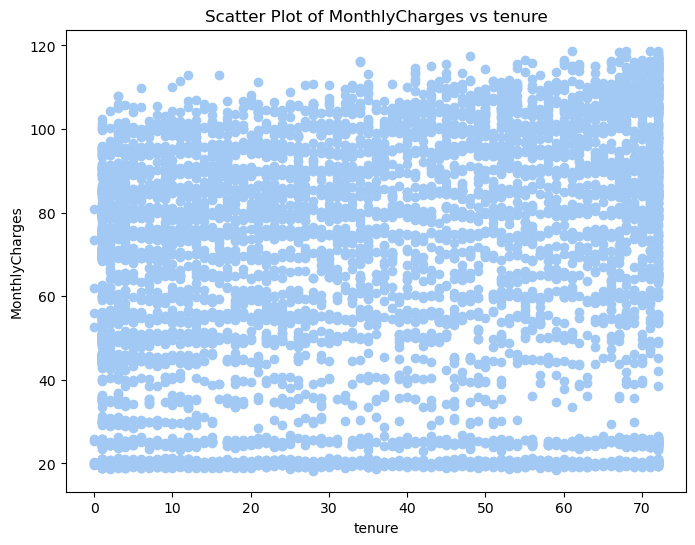

In [256]:
import pandas as pd
import matplotlib.pyplot as plt


# Create the scatter plot
plt.scatter(df[x_column], df[y_column])

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Scatter Plot of {} vs {}'.format(y_column, x_column))

# Display the plot
plt.show()


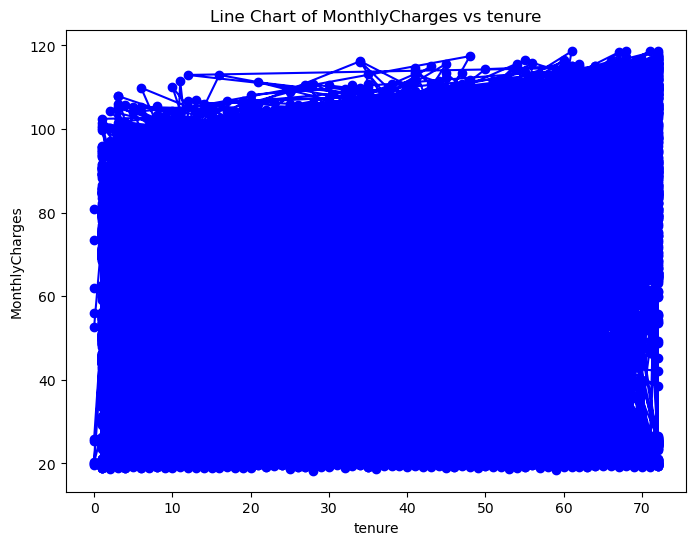

In [257]:
# Create the line chart
plt.plot(df[x_column], df[y_column], marker='o', linestyle='-', color='blue')

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Line Chart of {} vs {}'.format(y_column, x_column))

# Display the plot
plt.show()

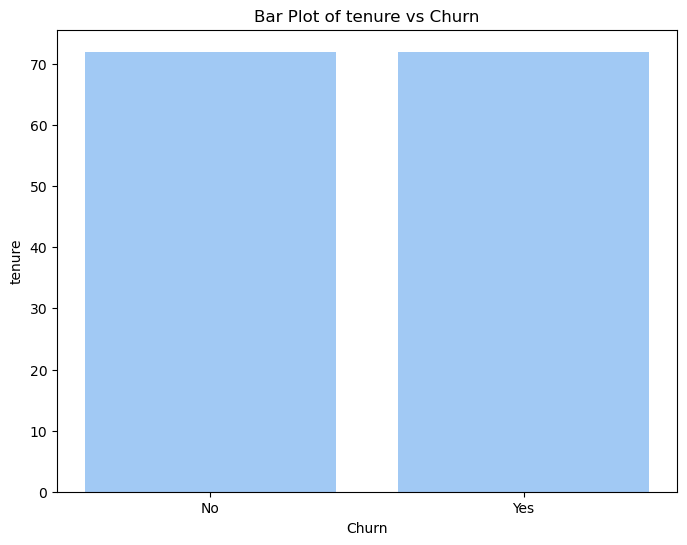

In [258]:
# Create the bar plot
x_column = 'Churn'
y_column = 'tenure'
plt.bar(df[x_column], df[y_column])

# Add labels and title
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title('Bar Plot of {} vs {}'.format(y_column, x_column))

# Display the plot
plt.show()

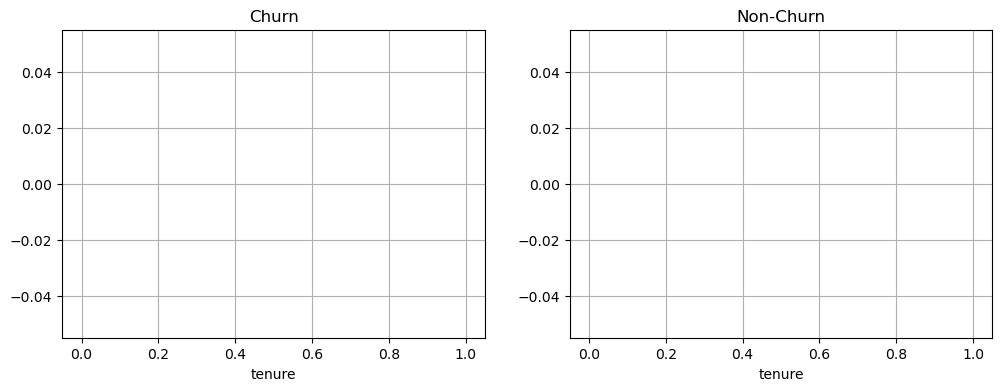

In [112]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(df[df['Churn']==1].tenure, bins = 30, ax = axes[0], kde = False)
ax.set_title('Churn')
ax.grid()
ax = sns.distplot(df[df['Churn']==0].tenure, bins = 30, ax = axes[1], kde = False)
ax.set_title('Non-Churn')
ax.grid()
plt.show()

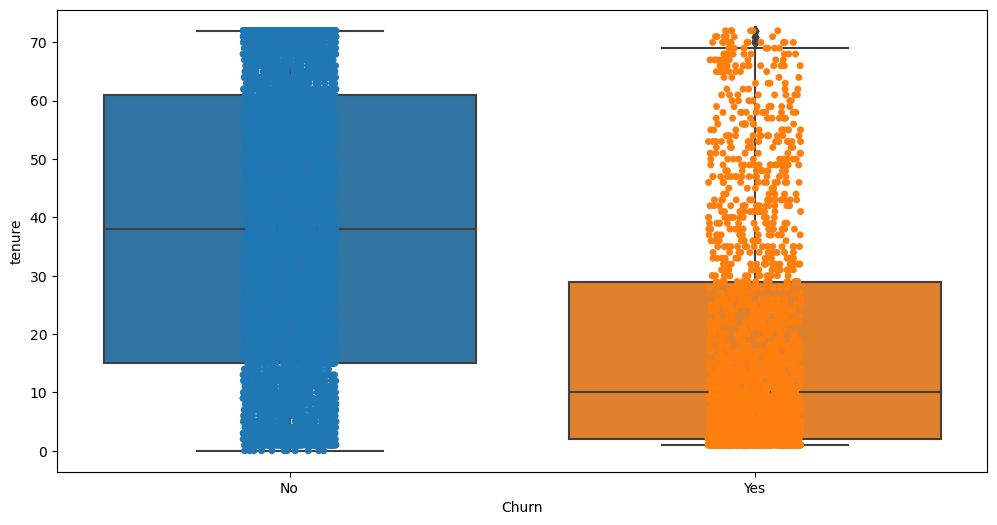

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
sns.stripplot(x='Churn', y='tenure', data=df, jitter=True, edgecolor="gray")
plt.show()

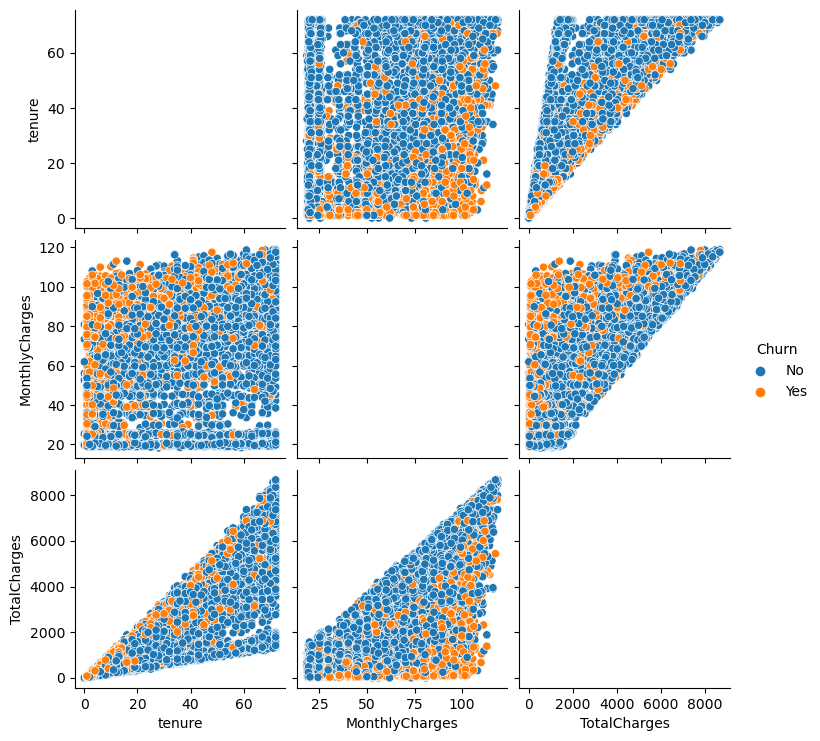

In [108]:
cols = num_cols
cols.append('Churn')
sns.pairplot(data=df[cols],hue='Churn',diag_kind='None')
plt.show()

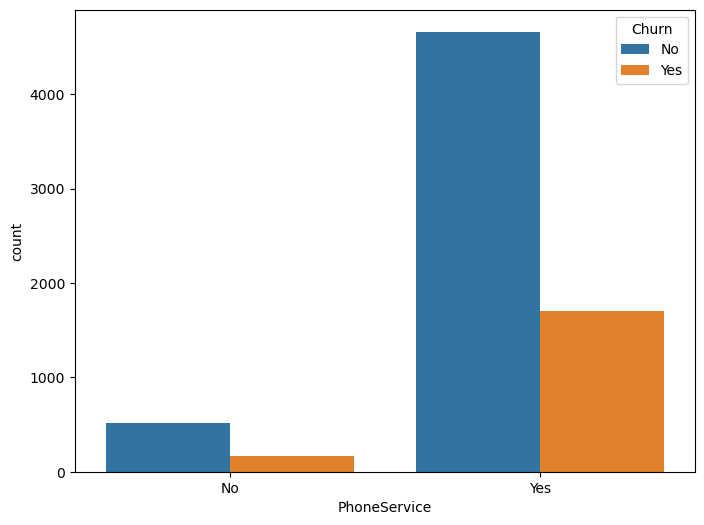

In [122]:
# Histogram of International Plan grouped by churn
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="PhoneService", hue='Churn', data=df);

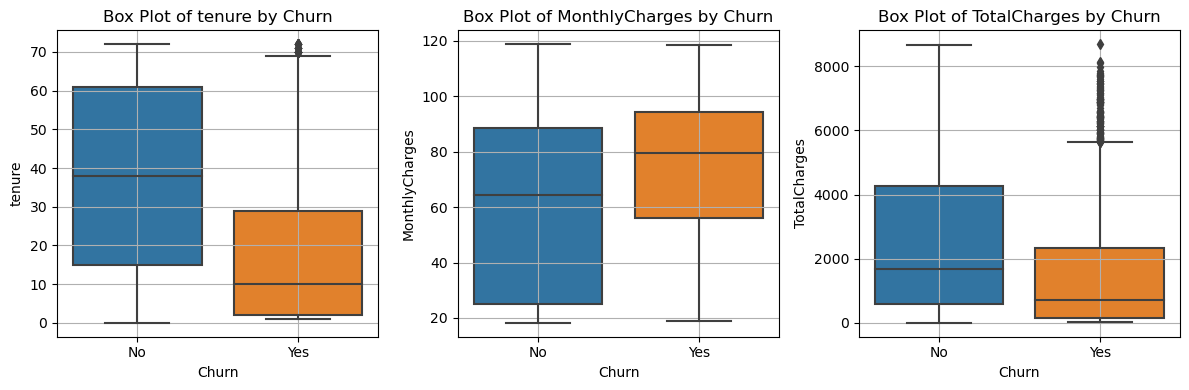

In [233]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
churn_column = 'Churn'

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(x=df[churn_column], y=df[column], ax=ax)
    ax.set_title(f'Box Plot of {column} by {churn_column}')
    ax.set_xlabel(churn_column)
    ax.set_ylabel(column)
    ax.grid(True)

plt.tight_layout()
plt.show()


#### Insights
* Higher the tenure, lesser the tendency to churn
* Higher the Montly Charges, higher the tendency to churn
* Customers who pay higher Monthly charges tend to churn faster, however customers who paid more in total charges churn lesser than those who paid less Total charges. However we can see some outliers

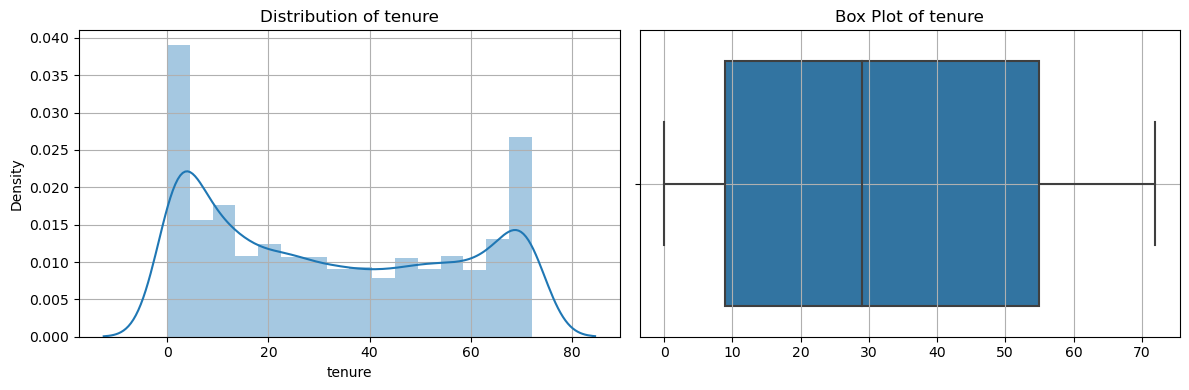

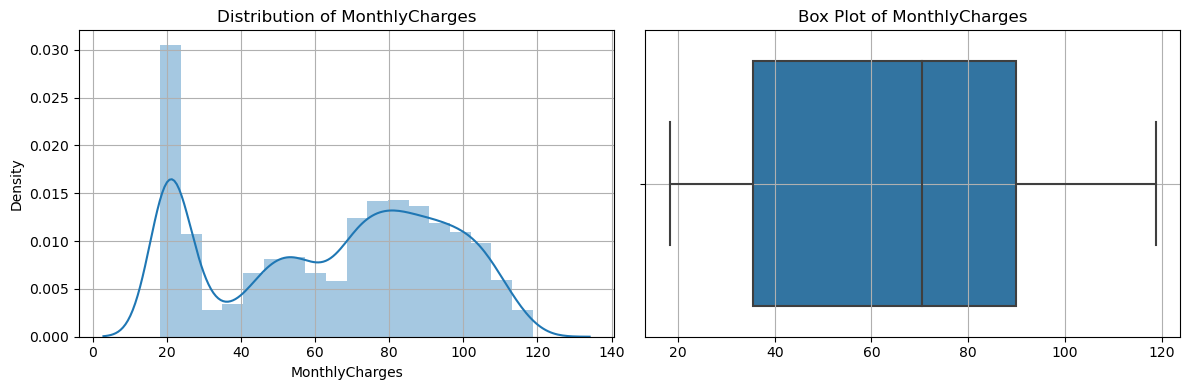

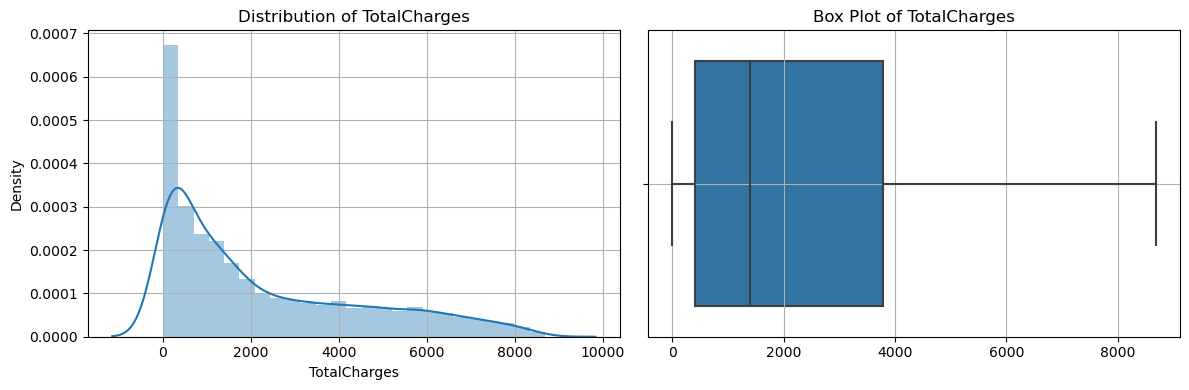

In [236]:
# Numerical
for i in num_cols:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the KDE plot
    sns.distplot(df[i], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[1].set_xlabel('')
    

    # Plot the horizontal box plot
    sns.boxplot(x=df[i], ax=axes[1])
    axes[1].set_title(f'Box Plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')
    

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

In [241]:
# Categorical
import pandas as pd
import matplotlib.pyplot as plt

sns.set_palette('pastel')  # Set color palette

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.2)

for i, column in enumerate(cat_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    ax.c vcounts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


SyntaxError: invalid syntax (3774213826.py, line 19)

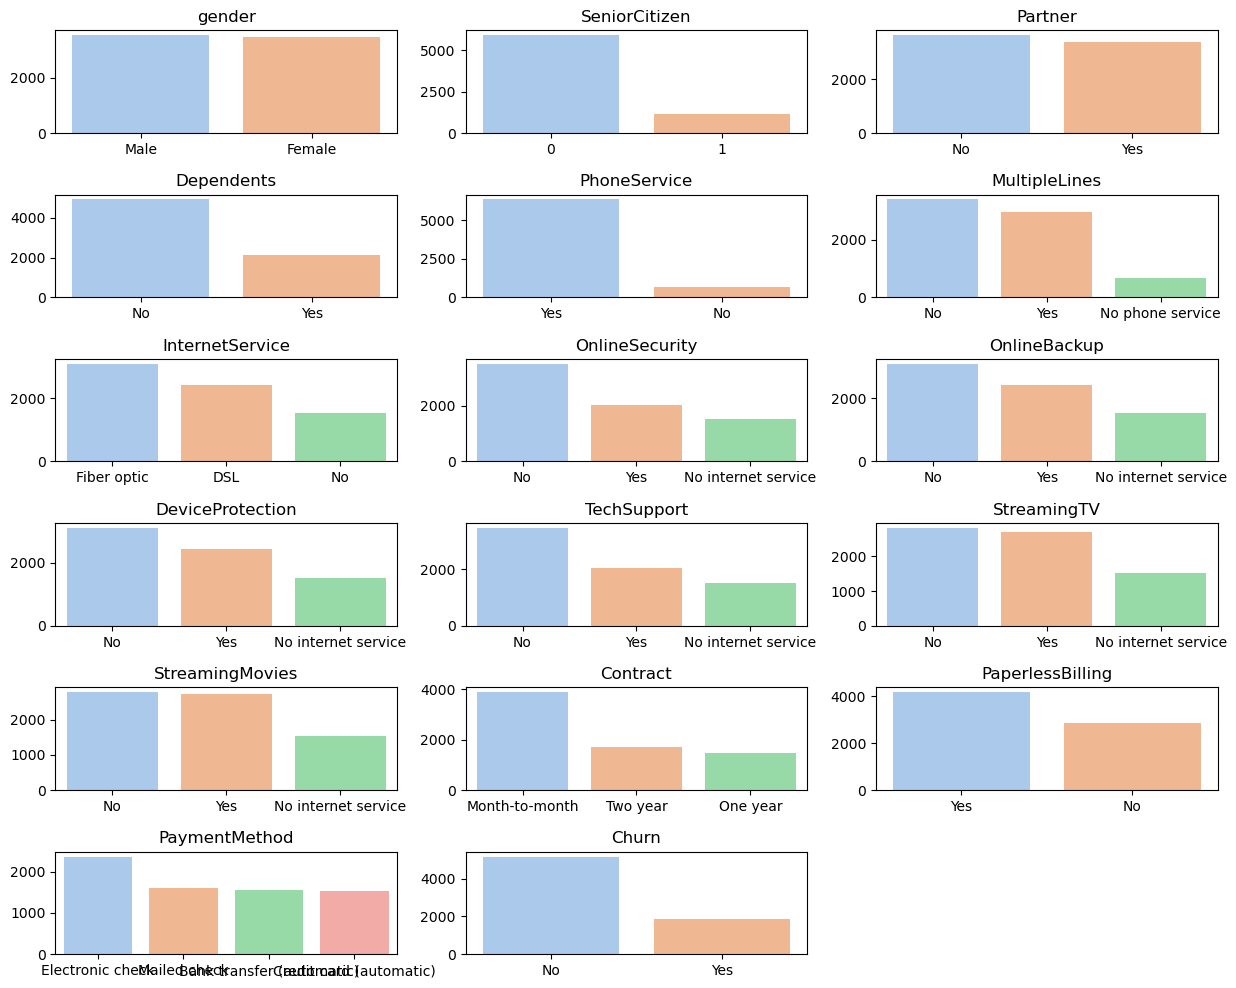

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = len(cat_cols)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(cat_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


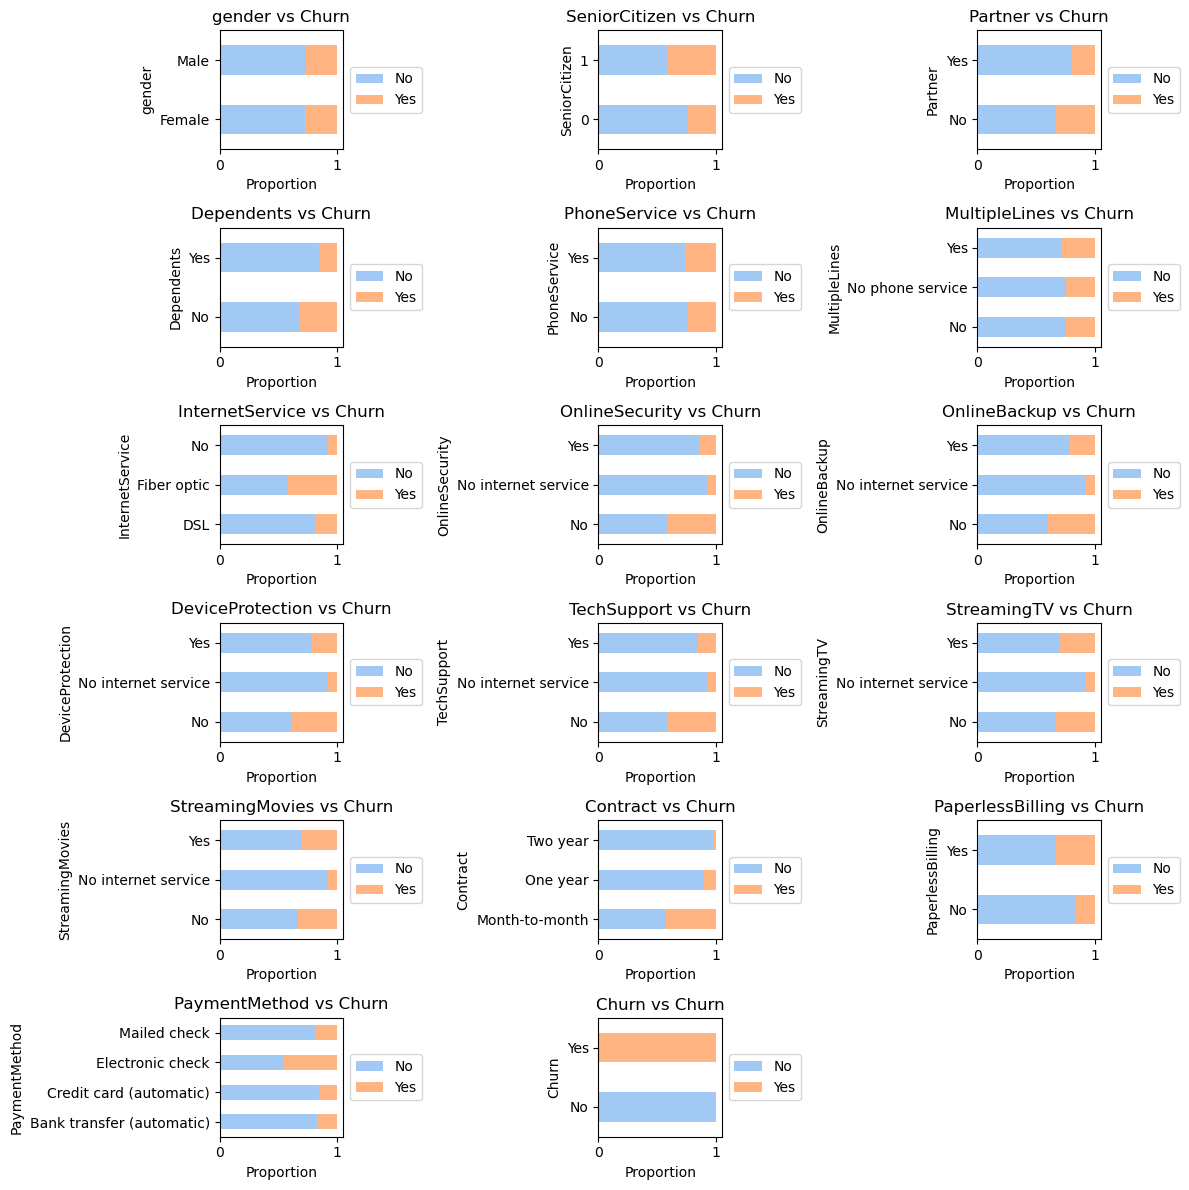

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'

num_plots = len(cat_cols)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(cat_cols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    
    # Create a cross-tabulation between 'Churn' and the current column
    crosstab = pd.crosstab(df[column], df['Churn'])
    
    # Normalize the values to represent proportions
    crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)
    
    # Plot the normalized values as horizontal stacked bar plots
    crosstab.plot(kind='barh', stacked=True, ax=ax)
    
    ax.set_title(f"{column} vs Churn")
    ax.set_xlabel('Proportion')
    ax.set_ylabel(column)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position

# Adjust the vertical spacing between subplots
plt.subplots_adjust(top=1)
plt.subplots_adjust(bottom=0.2)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


#### Insights
- **Gender vs Churn:**
  - Females have a churn rate of approximately 27% while males have a churn rate of around 26%.
  - Gender does not appear to have a significant impact on the churn rate.

- **SeniorCitizen vs Churn:**
  - Senior citizens (SeniorCitizen=1) have a higher churn rate of about 42% compared to non-senior citizens (SeniorCitizen=0) with a churn rate of approximately 24%.
  - SeniorCitizen status seems to be a significant factor influencing the churn rate.

- **Partner vs Churn:**
  - Customers without partners (Partner=No) have a slightly higher churn rate of about 33% compared to customers with partners (Partner=Yes) with a churn rate of around 20%.
  - Having a partner appears to have a positive impact on reducing the churn rate.

- **Dependents vs Churn:**
  - Customers without dependents (Dependents=No) have a higher churn rate of about 31% compared to customers with dependents (Dependents=Yes) with a churn rate of approximately 15%.
  - Having dependents seems to have a positive influence on reducing the churn rate.

- **PhoneService vs Churn:**
  - The churn rate for customers with phone service (PhoneService=Yes) is around 27% while for customers without phone service (PhoneService=No), it is about 25%.
  - Having or not having phone service does not significantly impact the churn rate.

- **MultipleLines vs Churn:**
  - Customers with multiple lines (MultipleLines=Yes) have a slightly higher churn rate of about 29% compared to customers with no multiple lines (MultipleLines=No or No phone service) with a churn rate of around 25%.
  - MultipleLines feature does not strongly influence the churn rate.

- **InternetService vs Churn:**
  - Customers with fiber optic internet service (InternetService=Fiber optic) have a significantly higher churn rate of about 42% compared to customers with DSL (churn rate around 19%) or no internet service (churn rate around 7%).
  - Fiber optic internet service appears to be a significant factor contributing to higher churn rates.

- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies vs Churn:**
  - Customers without these additional services (No or No internet service) generally have higher churn rates compared to customers with these services.
  - The impact of these services on churn rates varies, but in general, customers without these services tend to churn at higher rates.

- **Contract vs Churn:**
  - Customers with a month-to-month contract have a higher churn rate of about 43%, while customers with one-year and two-year contracts have lower churn rates of approximately 11% and 28% respectively.
  - Contract duration is a significant factor affecting the churn rate, with longer-term contracts showing lower churn rates.

- **PaperlessBilling vs Churn:**
  - Customers with paperless billing (PaperlessBilling=Yes) have a slightly higher churn rate of about 34% compared to customers without paperless billing (PaperlessBilling=No) with a churn rate of around 16%.
  - Paperless billing does have some impact on the churn rate, but the effect is not substantial.

- **PaymentMethod vs Churn:**
  - Customers using payment methods such as Electronic check have a higher churn rate of about 45% compared to other payment methods like Bank transfer (automatic), Credit card (automatic), or Mailed check, which have churn rates ranging from 15% to 19%.
  - Choice of payment method appears to be a significant factor influencing the churn rate.


<AxesSubplot:xlabel='PhoneService', ylabel='TotalCharges'>

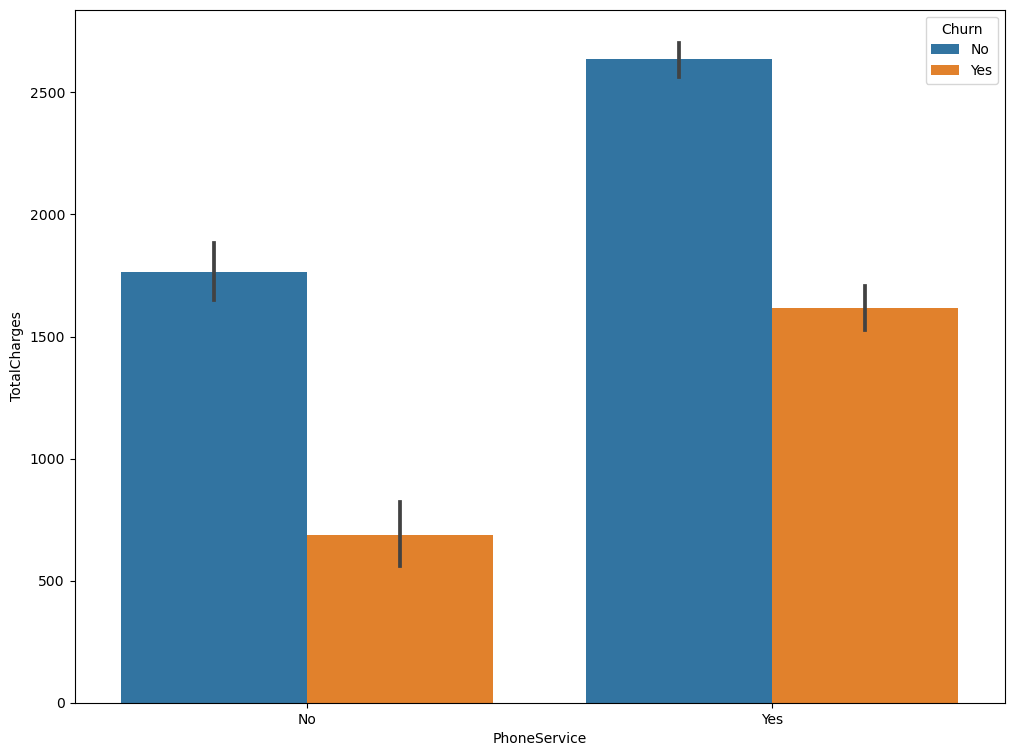

In [125]:
# Relation between PhoneService and TotalCharges with respect to Churn
plt.figure(figsize=(12, 9))
sns.barplot(data=df, x='PhoneService', y='TotalCharges', hue='Churn')

In [126]:
# Number of customers who have active PhoneService
print(f"{len(df[df['PhoneService']=='Yes'])} have active PhoneService, which means -->")
# Percentage of customers who have active PhoneService out of the total number of customers
print(f"1. {round((len(df[df['PhoneService'] == 'Yes'])/len(df))*100, 2 )} % customers have Active Phone Service.")
# Percentage of customers with active PhoneService who have churned out of the total number of customers with active PhoneService
print(f"2. {round((len(df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]))/(len(df[df['PhoneService']=='Yes']))*100,2)} % of customers with Active Phone Sevice have Churned.")

6361 have active PhoneService, which means -->
1. 90.32 % customers have Active Phone Service.
2. 26.71 % of customers with Active Phone Sevice have Churned.


In [127]:
# Number of customers who have inactive PhoneService
print(f"{len(df[df['PhoneService'] == 'No'])} have inactive PhoneService, which means -->")
# Percentage of customers who have inactive PhoneService out of the total number of customers
print(f"1. {round((len(df[df['PhoneService'] == 'No'])/len(df))*100, 2 )} % customers have Deactivated Phone Service.")
# Percentage of customers with inactive PhoneService who have churned out of the total number of customers with active PhoneService
print(f"2. {round((len(df[(df['PhoneService']=='No') & (df['Churn']=='Yes')]))/(len(df[df['PhoneService']=='Yes']))*100,2)} % of customers with Deactivated Phone Sevice have Churned.")

682 have inactive PhoneService, which means -->
1. 9.68 % customers have Deactivated Phone Service.
2. 2.67 % of customers with Deactivated Phone Sevice have Churned.


<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

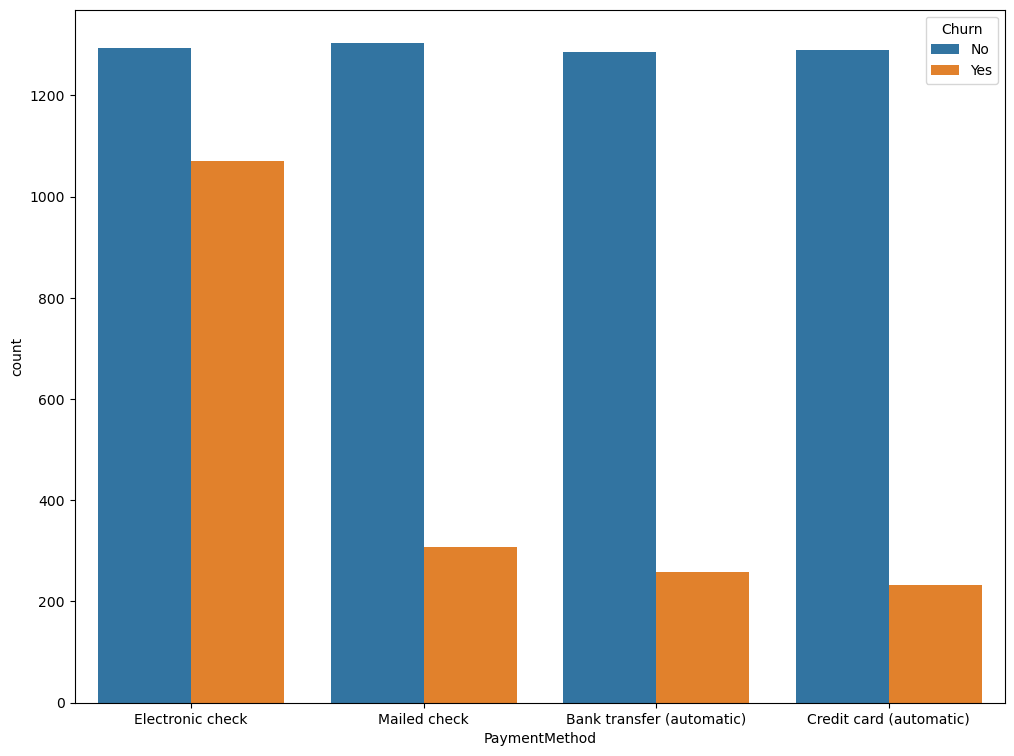

In [128]:
# Relation between PaymentMethod and Churn
plt.figure(figsize=(12,9))
sns.countplot(data=df,x='PaymentMethod', hue='Churn')

In [130]:
# Counting PaymentMethods where people churned
df[df['Churn']=='Yes']['PaymentMethod'].value_counts()

Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: PaymentMethod, dtype: int64

Text(0, 0.5, 'Churn')

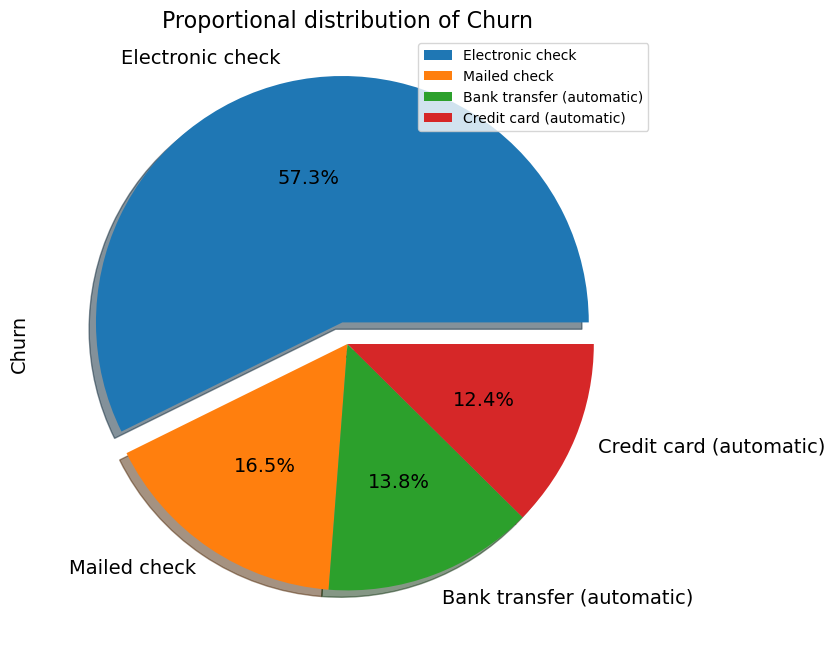

In [131]:
# Plotting the distribution of Paymenymethod where people churned
df[df['Churn']=='Yes']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%", shadow=True, figsize=(8,8),fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

Text(0, 0.5, 'Churn')

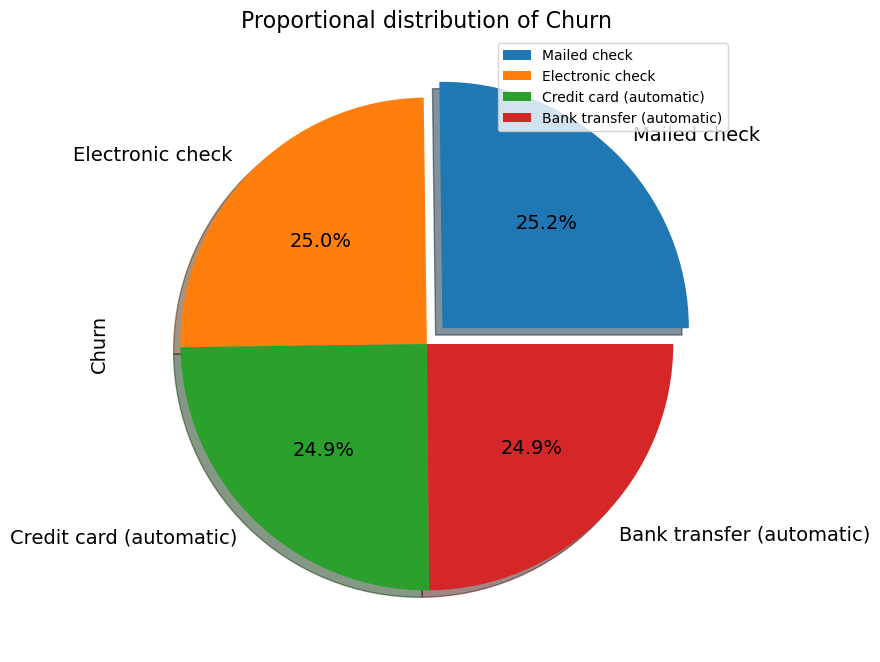

In [132]:
# Distribution of paymentmethod where people did not churn
df[df['Churn']=='No']['PaymentMethod'].value_counts().plot(kind='pie',explode=[0.09,0,0,0],legend=True,autopct="%3.1f%%",shadow=True,figsize=(8,8),fontsize=14)
plt.title('Proportional distribution of Churn', fontsize=16)
plt.ylabel('Churn',fontsize=14)

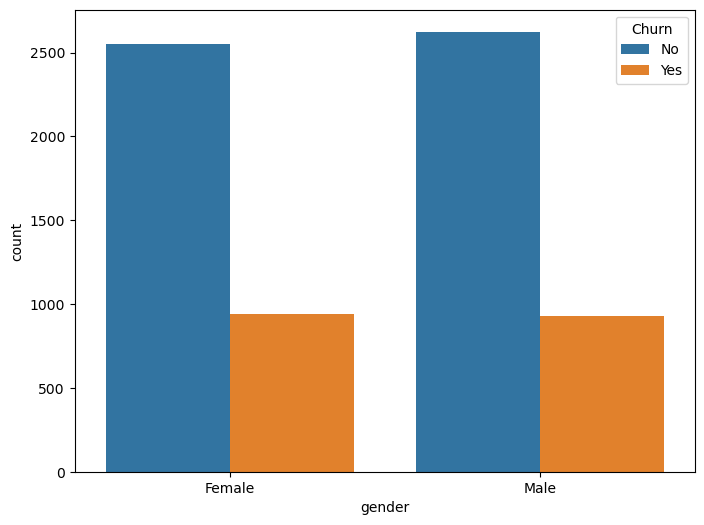

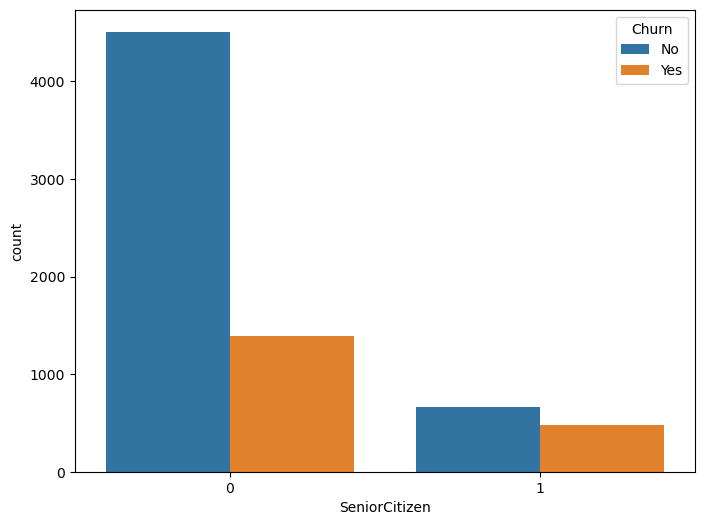

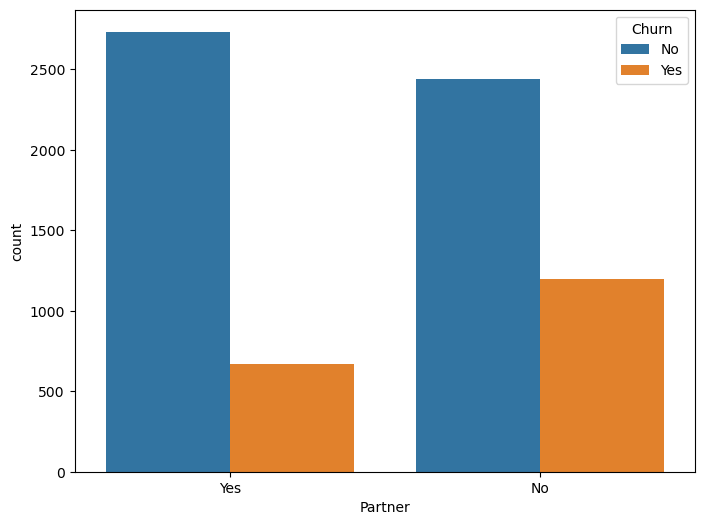

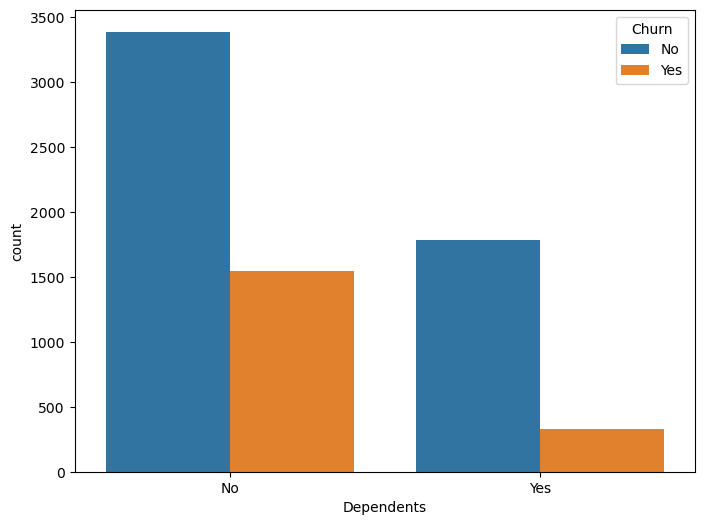

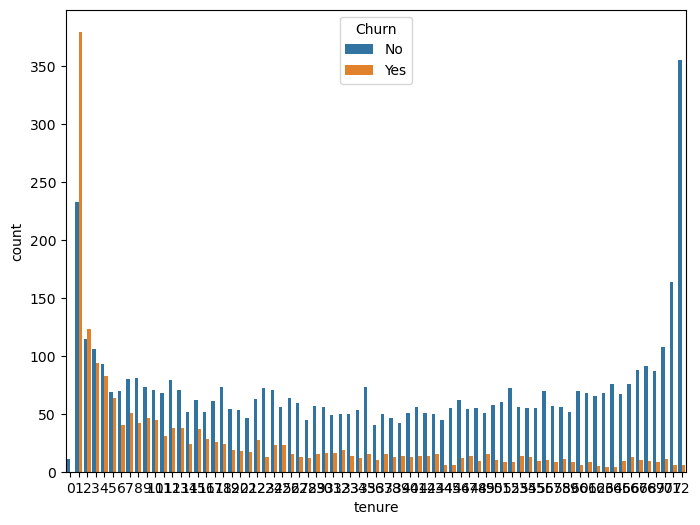

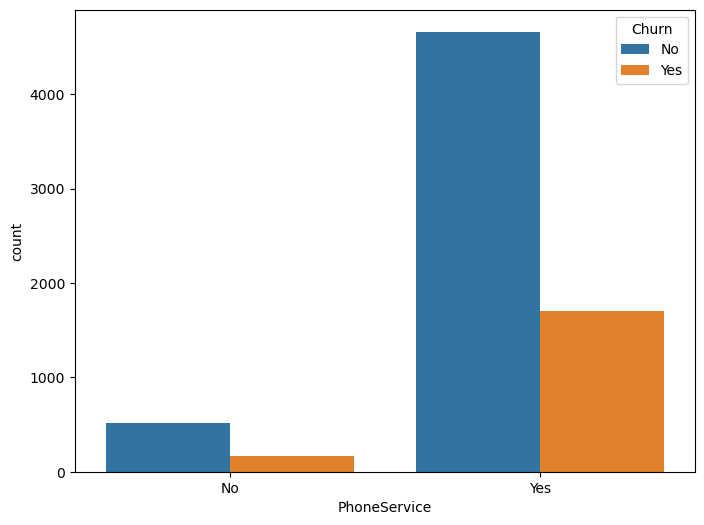

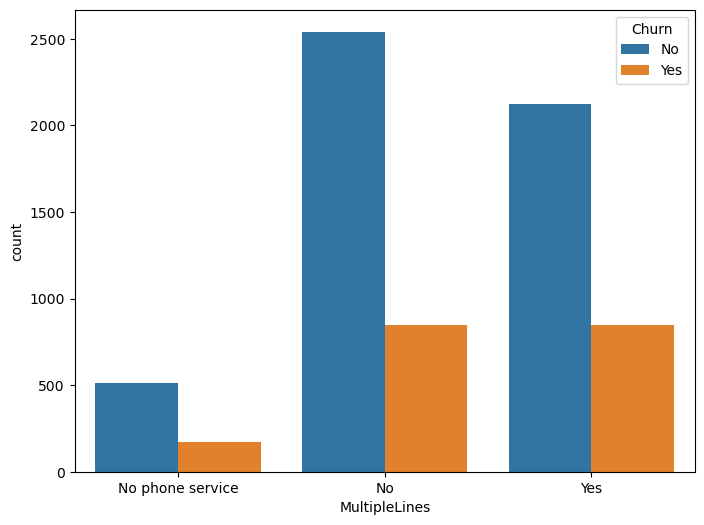

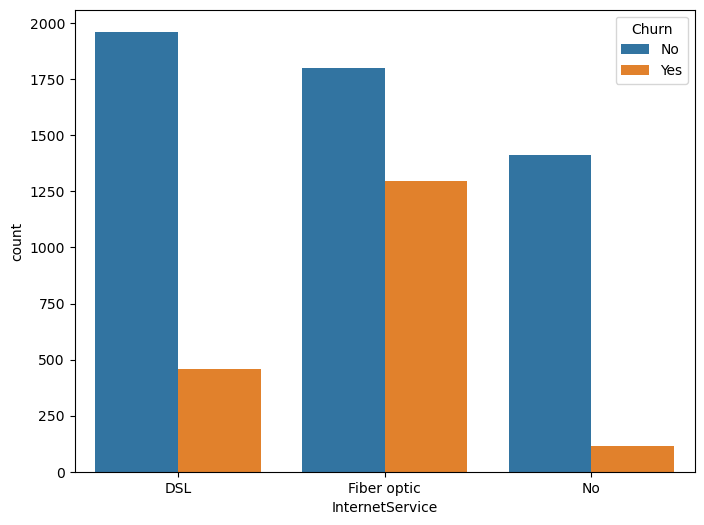

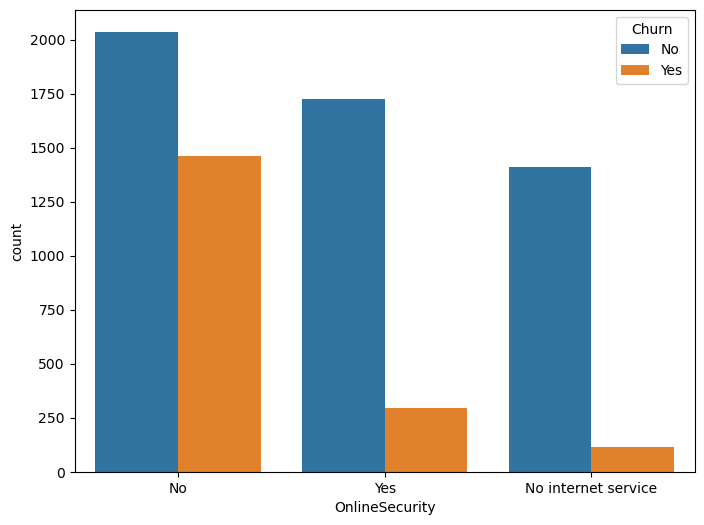

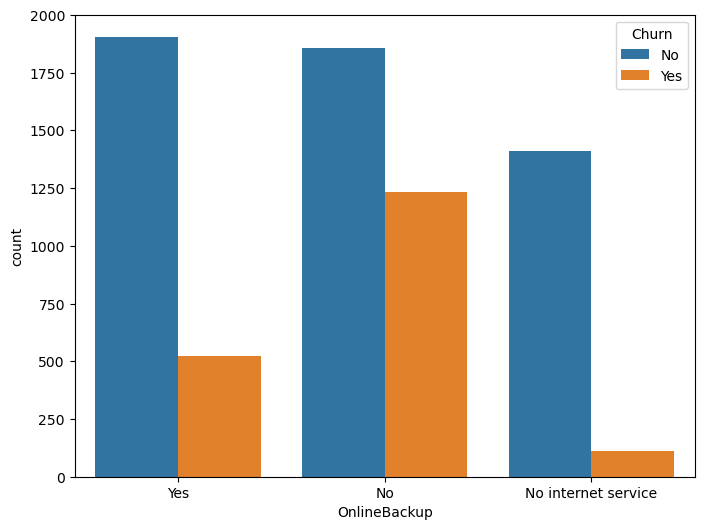

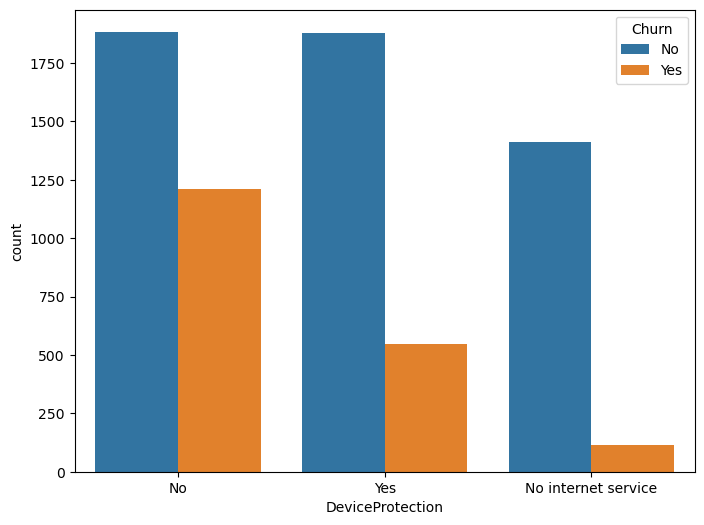

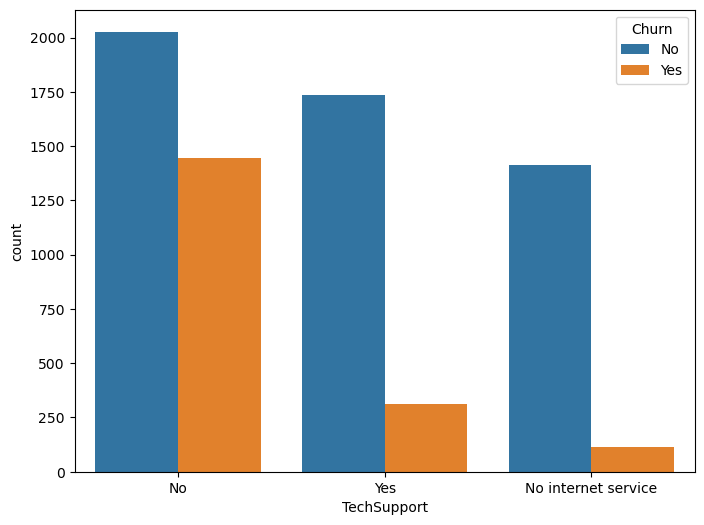

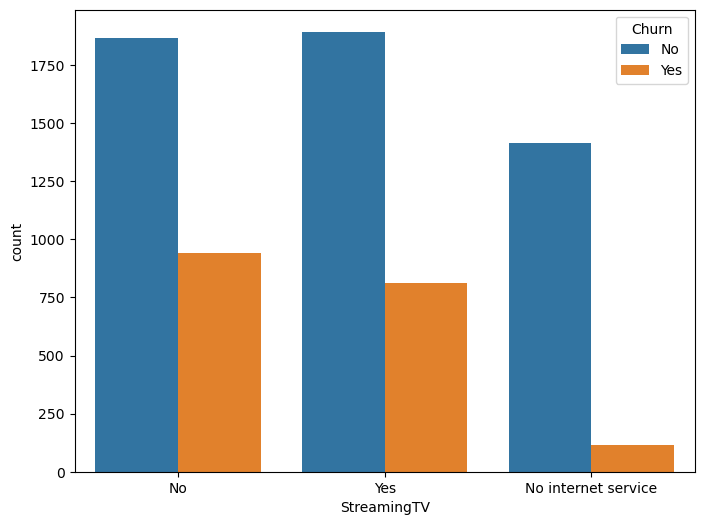

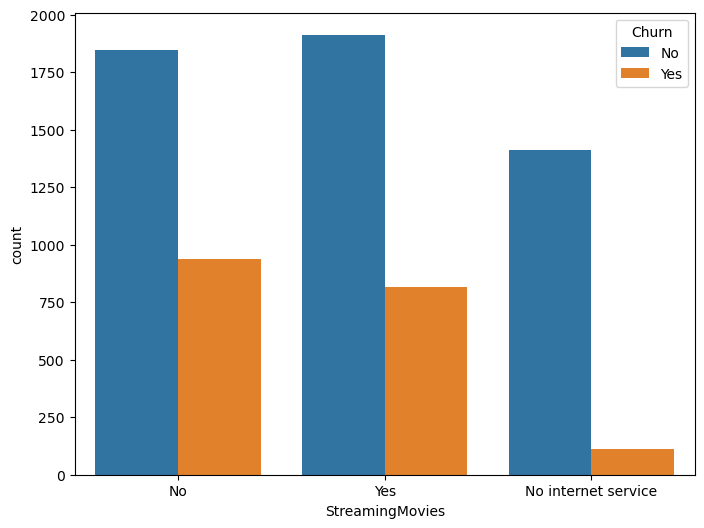

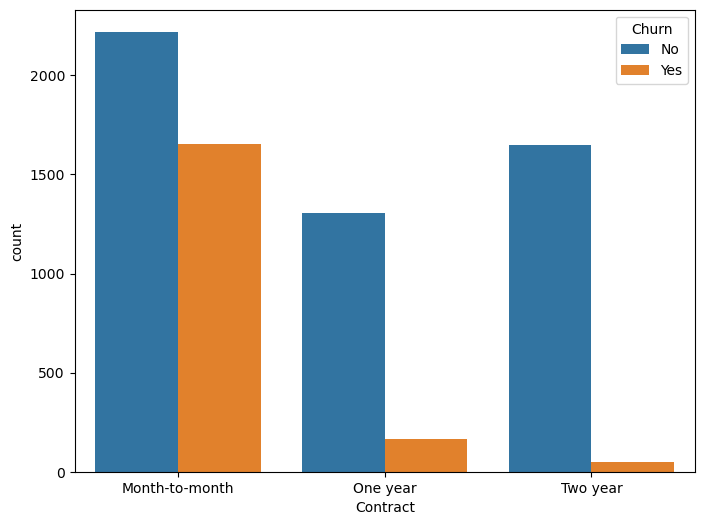

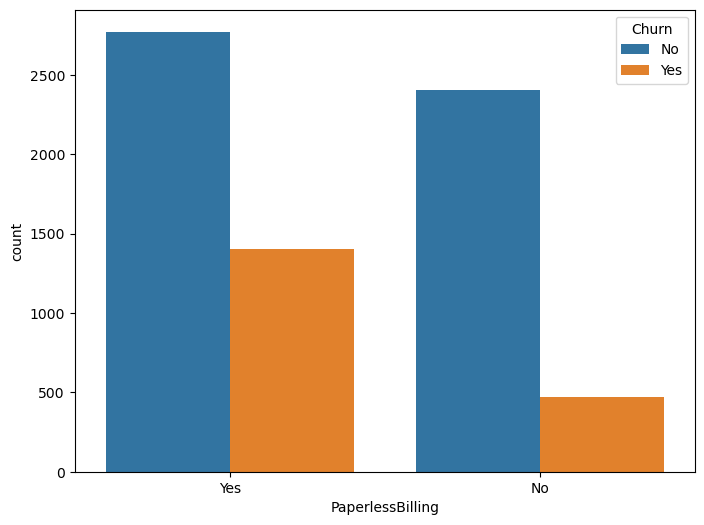

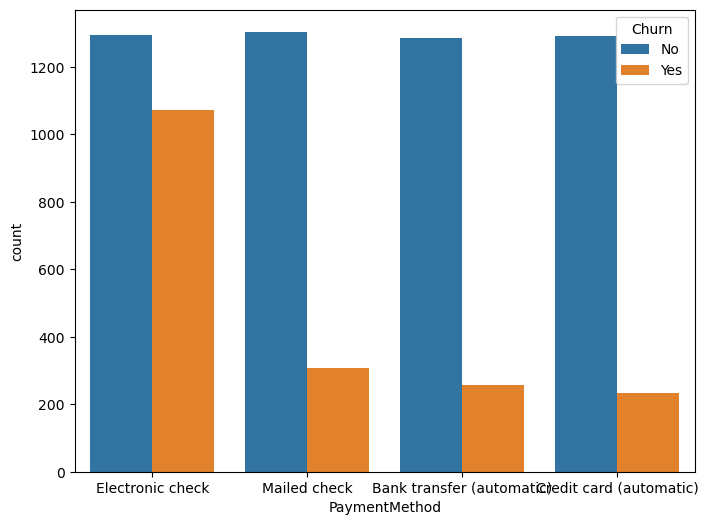

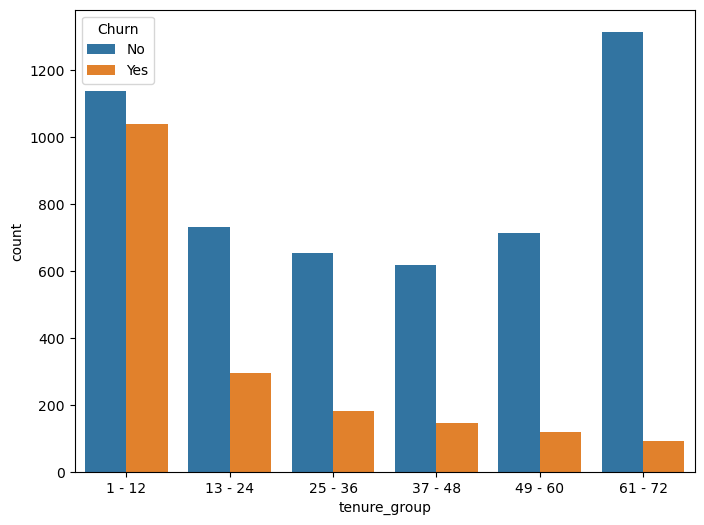

In [164]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

#### Insight
* Senior Citizens are less likely to churn as can be seen from the distribution above.
* From the distribution above, it can be seen that customers without partners are churning more in comparison to customers with partners.
* Customers with no tech support are churning more. The customers with no internet service are churning the least.
* Customers who use Paperless Billing are churning more in comparison to their counterparts.
* Tenure groups of 1-12 and 13–24 are churning more which can be intuitively understood from the fact that teens and early 20s customers are changing their telecom services more frequently and thus are not so loyal customers in comparison to their parents or grandparents.
* Some of them are teens and 20s people, customers without partners, customers who use paperless billing, and without tech support churn more. Of course, with more analysis techniques there are more insights that can be extracted from the dataset.

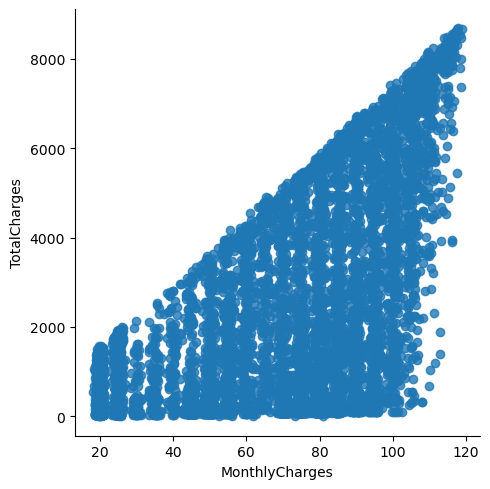

In [166]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

### Build a correlation of all predictors with ‘Churn’

<AxesSubplot:>

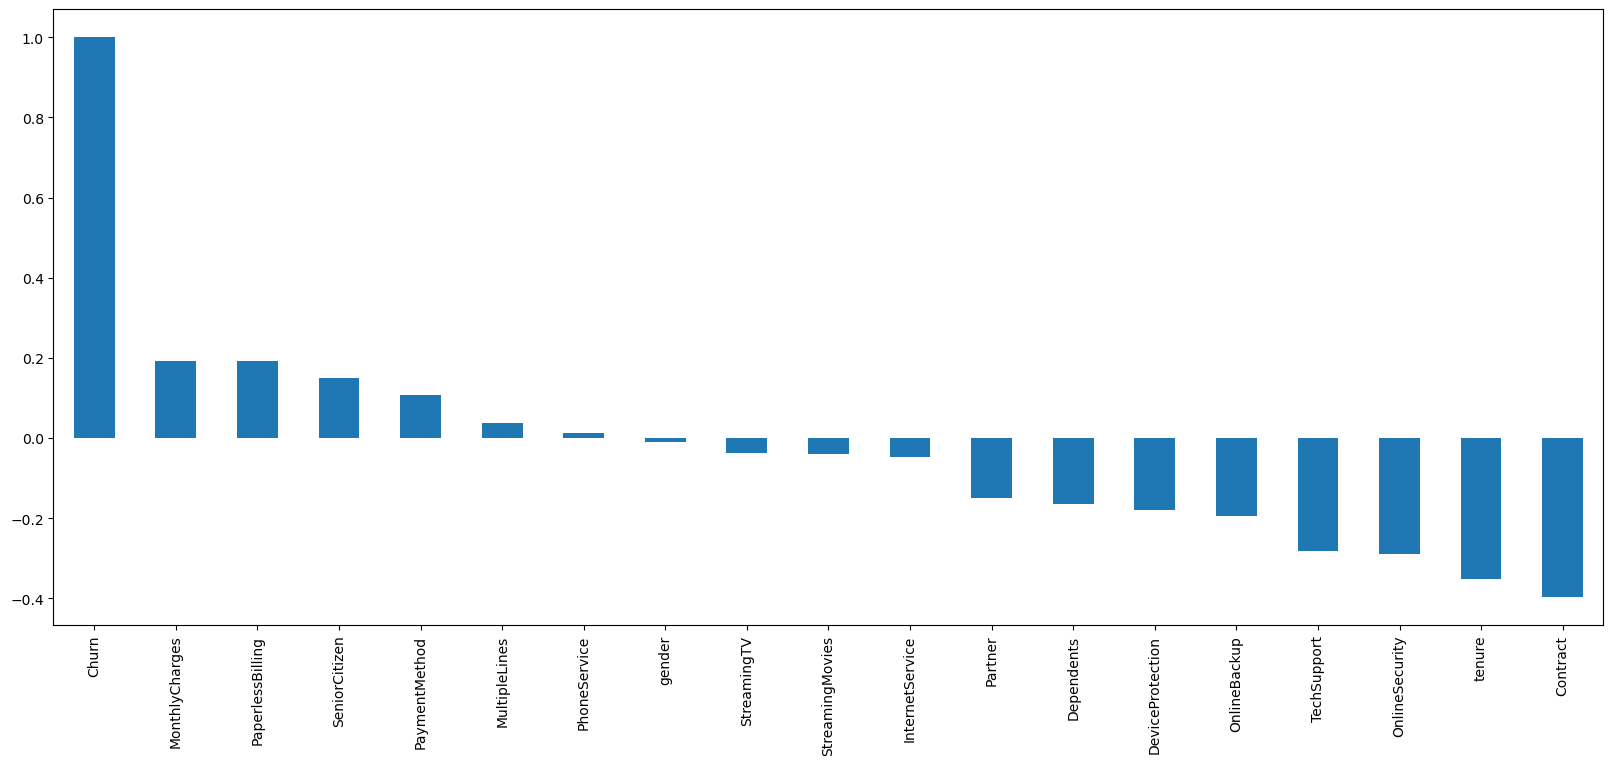

In [178]:
plt.figure(figsize=(20,8))
df_e.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### From the above graph, we can observe that.
* HIGH Churn is seen in the case of Month to month contracts, No online security, No Tech support, First year of subscription, and Fibre Optics Internet
* LOW Churn is seen in the case of Long term contracts, Subscriptions without internet service, and The customers engaged for 5+ years
* Factors like Gender, Availability of PhoneService, and # of multiple lines have almost NO impact on Churn

# <font color='blue'>Encoding</font>

In [102]:
from sklearn.preprocessing import LabelEncoder
# Creating a copy of the dataset
df_e=df.copy()
# Creating an instance of LabelEncoder
le=LabelEncoder()
# Iterating over each column in the 'cols' variable
for i in cat_cols:
    # Applying label encoding to the selected column
    # The original column is replaced with the encoded values
    df_e[i]=le.fit_transform(df_e[i])
    
df_e.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
"""# Remove categorical columns from df
df_numeric = df.drop(categorical_columns, axis=1)

# Perform one-hot encoding on categorical columns
df_categorical = pd.get_dummies(df[categorical_columns])

# Concatenate the encoded columns with the numeric columns
df_encoded = pd.concat([df_numeric, df_categorical], axis=1)

# Update df with the encoded columns
df = df_encoded"""

# <font color='blue'> Outlier Detection with Box Plot</font>

* To plot box for categorical, they need to be encoded

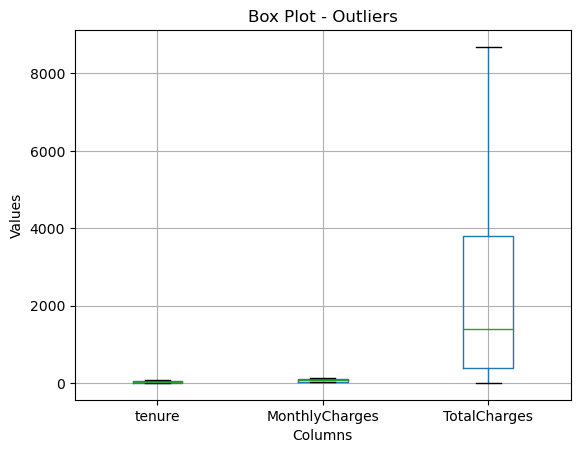

In [87]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
#df.boxplot()

# Generate box plots for the specified columns
df[num_cols].boxplot()
# df.boxplot(columns_to_check)

plt.title('Box Plot - Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.show()

#Displaying all columns in the dataframe on a single figure
#df.plot(kind='box');

In [2]:
import plotly.express as px
fig = px.box(df, y="tenure")
fig.show()

NameError: name 'df' is not defined

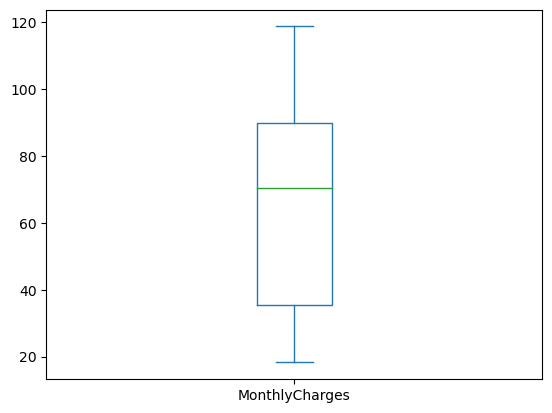

In [92]:
#Simple boxplot using pandas
df['MonthlyCharges'].plot(kind='box');
#Rotating the box plot so it is horizontal
#df['MonthlyCharges'].plot(kind='box', vert=False);

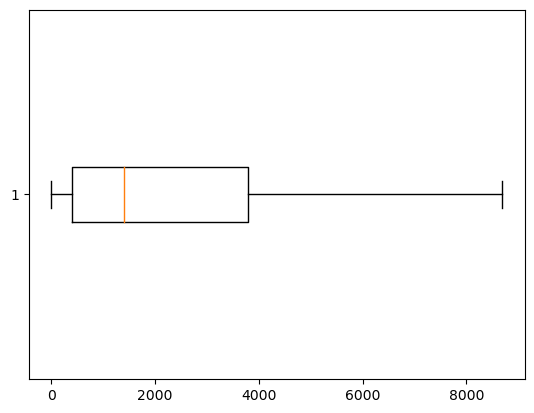

In [93]:
#Using matplotlib to make a boxplot
plt.boxplot(x=df['TotalCharges'], vert=False);

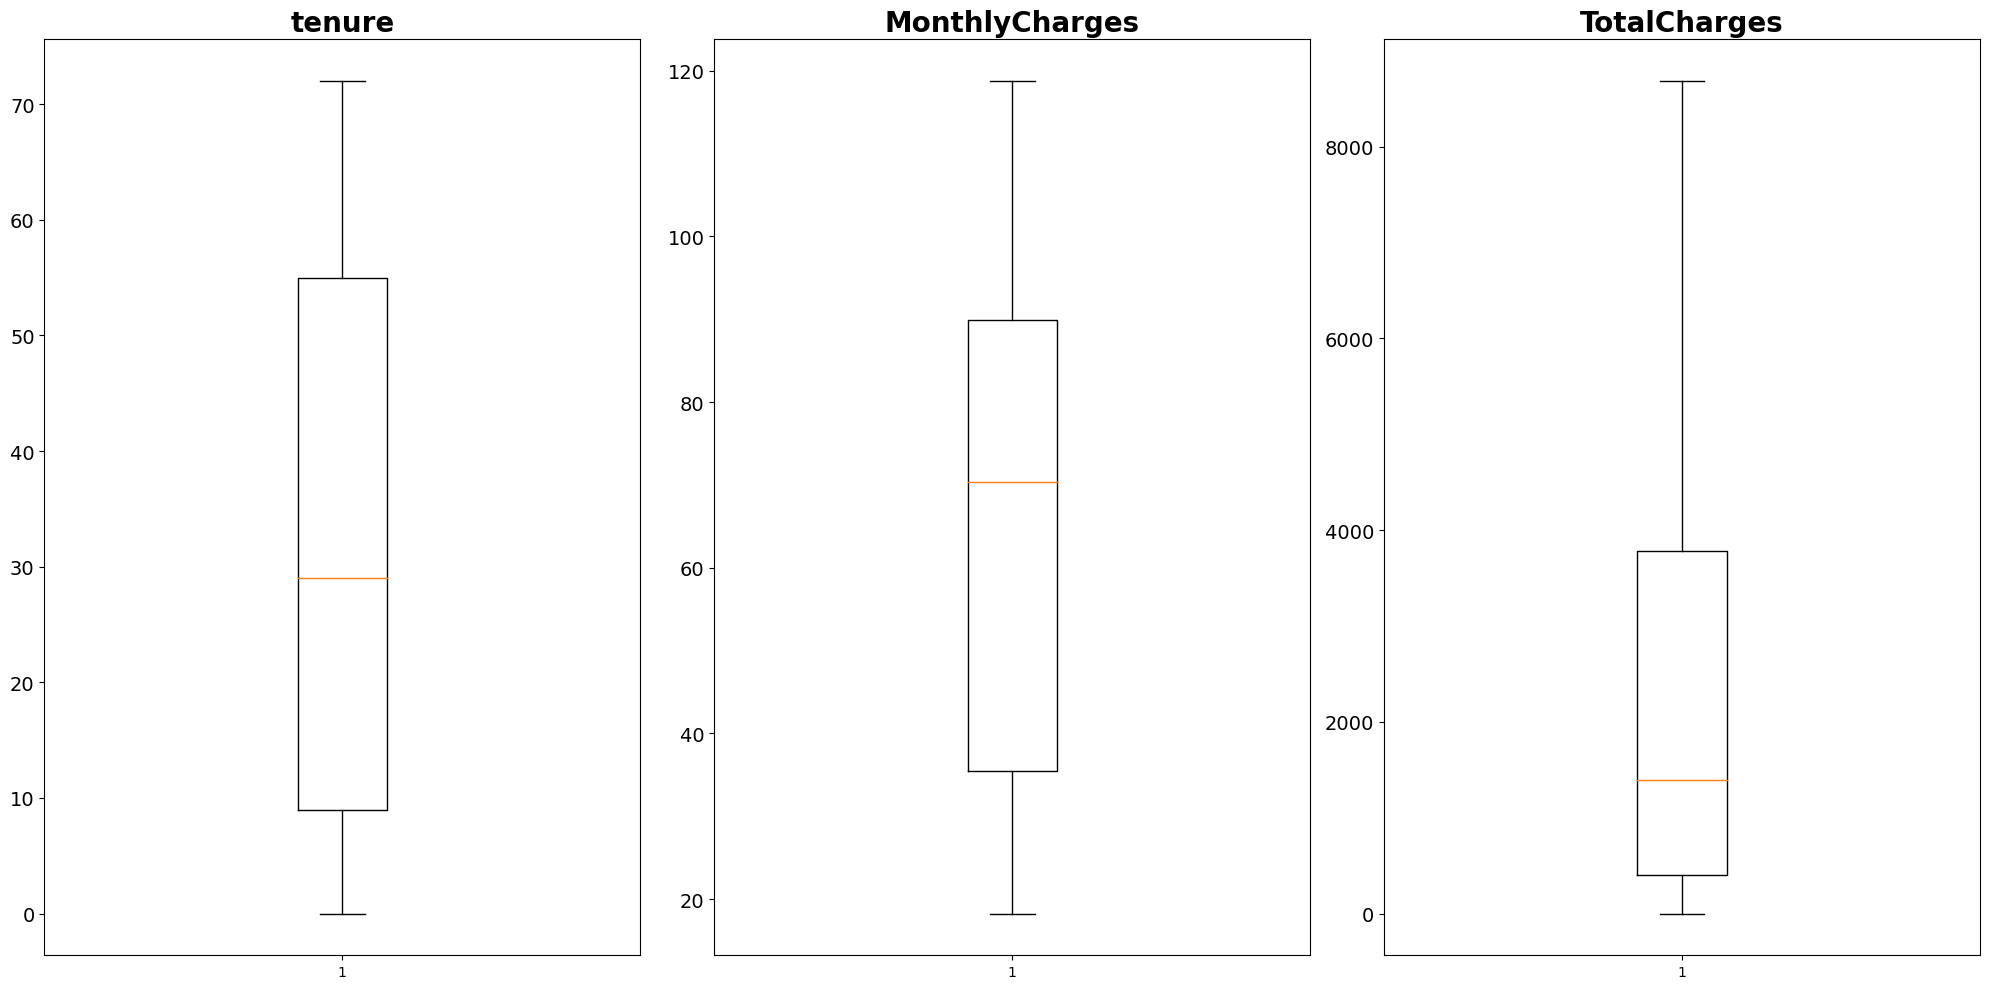

In [98]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(num_cols), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df[num_cols[i]], flierprops=red_circle)
    ax.set_title(num_cols[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [ ]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

<AxesSubplot:title={'center':'tenure'}, xlabel='Churn'>

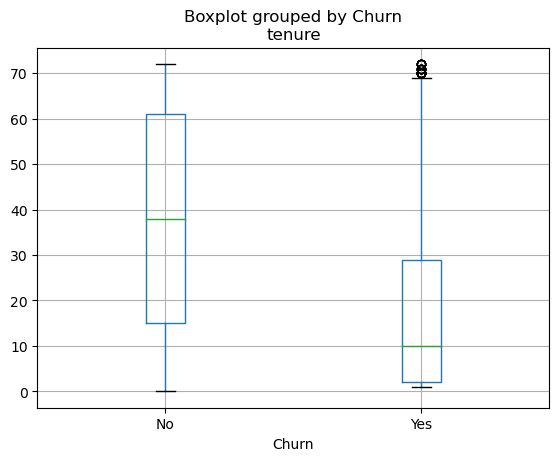

In [117]:
# Box Plot for Account Length attribute 
df.boxplot(column='tenure',by='Churn')

* The mean is different for both the churn group.

In [ ]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

## Handling outliers  (----Add)
* https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

## Extra

### Group the tenure to bins
There are time-based variables like age or tenure or something measured in terms of weeks, months, or years it is better for variables that need to be converted into various bins like the one below so they can be categorized well. For example, in this case, we have the tenure variable, so we divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group of 1–12, for tenure between 1 to 2 Yrs, tenure group of 13–24; so on.

In [162]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [ ]:
# Advanced EDA
from pandas_profiling import ProfileReport
# Pandas profiling before data preprocessing
profile = ProfileReport(df, title='Pandas profiling before data preprcessing', minimal=True, progress_bar=False)
profile.to_notebook_iframe()

# Saving the obesvation from pandas profiling after data preprocessing
profile.to_file(output_file="data_train_after_preprocessing.html")

# Logistic Regression - day3

In [137]:
X=df_e.drop('Churn',axis=1)
y=df_e['Churn']

In [138]:
X.shape

(7043, 18)

In [139]:
y.shape

(7043,)

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1, stratify=y)

# What may go wrong in this kind of split?
# Evaluation
# In target, only churn - yes could come off
# So stratified = yes, will ensure Yes and No will be equal
# Churn rate will be same as with train data

NameError: name 'X' is not defined

# Model Building

In [144]:
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression classifier
logreg = LogisticRegression()

# Train the classifier on the training data
logreg.fit(X_train, y_train)

y_train_pred = logreg.predict(X_train)

# Predict the labels for the test data - y_test_pred
y_pred = logreg.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8141843971631205


### Precision Recall Curve

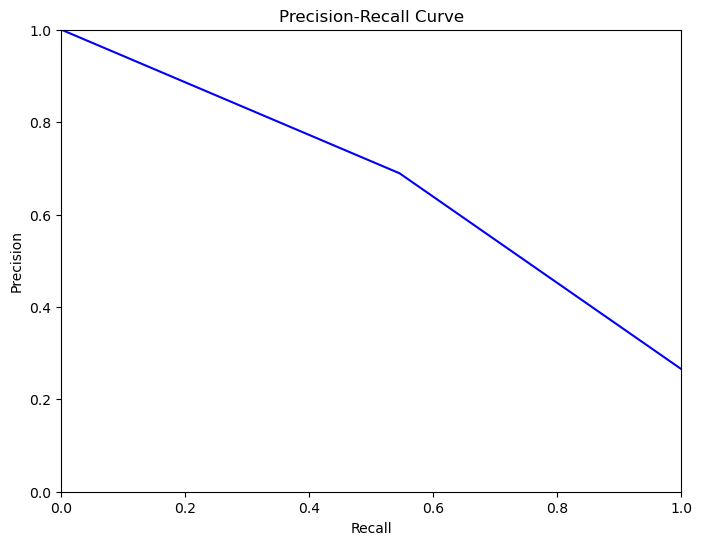

In [182]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot precision-recall curve
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Set plot limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# Show the plot
plt.show()

# Confusion Matrix

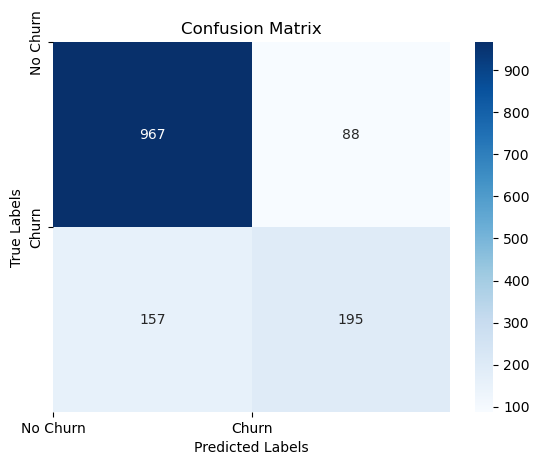

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(2), ['No Churn', 'Churn'])
plt.yticks(np.arange(2), ['No Churn', 'Churn'])

# Show the plot
plt.show()

# Checking the accuracy on a scatter plot.

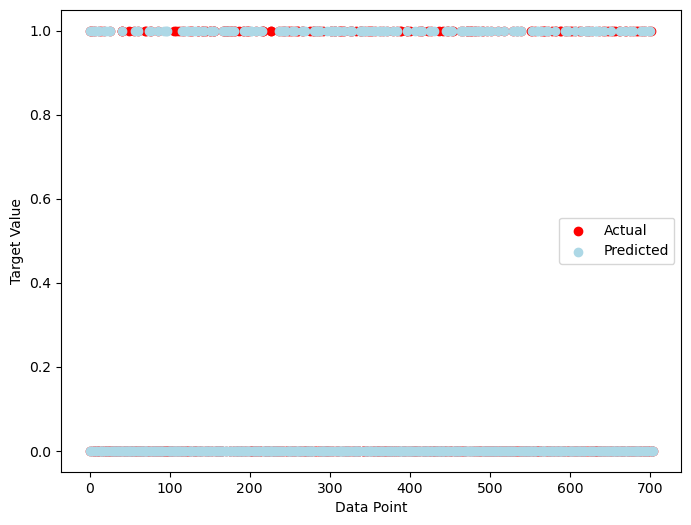

In [183]:
plt.scatter(range(len(y_test)), y_test, c='red', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, c='lightblue', label='Predicted')

# Add labels and legend
plt.xlabel('Data Point')
plt.ylabel('Target Value')
plt.legend()

# Show the plot
plt.show()

In [ ]:
#No Std
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(max_iter=1000) #fixed error
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

## -- Second Model ---

In [146]:
from sklearn.model_selection import cross_val_score
# Logistic regression
# Building a logistic regression model, performs cross-validation with 5-fold and 'roc_auc' scoring, and printing the scores along with their mean
log_model=LogisticRegression(max_iter=1000)
scores=cross_val_score(estimator=log_model,X=X_train,y=y_train,cv=5,scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

[0.83917075 0.84433636 0.83750602 0.84245851 0.8533387 ]
Mean 0.8433620680364073


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [150]:
# Confusion Matrix for y_test and y_test_pred
confusion_mat=pd.DataFrame(confusion_matrix(y_test, y_pred))

In [151]:
# Assigning custom index and column labels to a confusion matrix DataFrame and displaying the confusion matrix
confusion_mat.index=['Actual Negative', 'Actual Positive']
confusion_mat.columns=['Predicted Negative', 'Predicted Positive']
confusion_mat

,Predicted Negative,Predicted Positive
Actual Negative,472,46
Actual Positive,85,102


### Accuracy Score

In [152]:
# Accuracy score on the training set
print('Accuracy score for train data is:', accuracy_score(y_train, y_train_pred))

Accuracy score for train data is: 0.8035657936257494


In [153]:
# Accuracy score on the test set.
print('Accuracy score for test data is:', accuracy_score(y_test, y_pred))

Accuracy score for test data is: 0.8141843971631205


## Precision Score

In [155]:
# Precision score on the training set
print('Accuracy score for train data is:', precision_score(y_train, y_train_pred))

Accuracy score for train data is: 0.6533333333333333


In [156]:
# Precision score on the test set.
print('Accuracy score for test data is:', precision_score(y_test, y_pred))

Accuracy score for test data is: 0.6891891891891891


## Recall Score

In [158]:
# recall score on the training set
print('Accuracy score for train data is:', recall_score(y_train, y_train_pred))

Accuracy score for train data is: 0.5535077288941737


In [160]:
# recall score on the test set.
print('Accuracy score for test data is:', recall_score(y_test, y_pred))

Accuracy score for test data is: 0.5454545454545454


In [ ]:
# Shyams Model with one hot encoding
# Remove categorical columns from df
df_numeric = df.drop(categorical_columns, axis=1)

# Perform one-hot encoding on categorical columns
df_categorical = pd.get_dummies(df[categorical_columns])

# Concatenate the encoded columns with the numeric columns
df_encoded = pd.concat([df_numeric, df_categorical], axis=1)

# Update df with the encoded columns
df = df_encoded


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variable
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female', 'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes']  # Add the relevant feature columns
target = 'Churn'  # Replace 'Churn' with the actual target variable column

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

# Calculate the metrics for train set
train_cm = confusion_matrix(y_train, y_train_pred, labels=['No', 'Yes'])
train_tn, train_fp, train_fn, train_tp = train_cm.ravel()
train_tpr = recall_score(y_train, y_train_pred, pos_label='Yes')
train_tnr = train_tn / (train_tn + train_fp)
train_f1 = f1_score(y_train, y_train_pred, pos_label='Yes')

# Calculate the metrics for test set
test_cm = confusion_matrix(y_test, y_test_pred, labels=['No', 'Yes'])
test_tn, test_fp, test_fn, test_tp = test_cm.ravel()
test_tpr = recall_score(y_test, y_test_pred, pos_label='Yes')
test_tnr = test_tn / (test_tn + test_fp)
test_f1 = f1_score(y_test, y_test_pred, pos_label='Yes')

# Print the metrics for train set
print("Train Set Metrics:")
print(f"True Positive Rate (TPR): {train_tpr:.2f}")
print(f"True Negative Rate (TNR): {train_tnr:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print()

# Print the metrics for test set
print("Test Set Metrics:")
print(f"True Positive Rate (TPR): {test_tpr:.2f}")
print(f"True Negative Rate (TNR): {test_tnr:.2f}")
print(f"F1 Score: {test_f1:.2f}")


## Research Questions
For those who unsubscribed the service, how long did them usually stay in the service? and what was their average LTV(Life Time Value)?

Relating to Question 1, what kinds of service they subscribed when they were still staying in subscription?

For those who are still paying the service, what was their average LTV(Life Time Value)? and how long did they usually stay in the service?

Relating to Question 3, what are the proportions of each kinds of service they are paying?

For those who are still in service and with LTV more than the LTV of leaked customers, which service they are paying the most?

For those who unsubscribed and still are subscibing the service, what is the proportion of each kinds of contract by each group?

Among 'gender', 'Partner', 'Dependents','PhoneService', 'InternetService', 'contract', and 'PaymentMethod', what variable affected the LTV the most?

* URL - https://github.com/YuehHanChen/Telco_Customer_Churn_Analysis/blob/master/Telco_Customer_Churn_Analysis.ipynb

Always have like this
Train set metrics


In [ ]:
train test split
train the model
evaluate on train data
"" test data
fine tuning/other algorithm
prediction

In [ ]:
fn rate is very good both on train and test
focus strategy on those

In [ ]:
Biggest trick in classification world - heavy stress
prediction value is between 0 and 1 not just 0 or 1 directly
play around with all deltas and which ever give su best accuracy choose that
0.5 usual probabilyt defintino
home assigmnt brainstorm
how can i change 0.5 play around with this
yields great results


7 - 20 % distribution is very good for target variable
but in real world its always 1%

# Assignment
Presentation will have 10 slides
Slide 1
column name | p value | insight

slide 2
Strategy - what to do to retain

Slide 3
Visuals

Potential WHYs for churn
1 slide presentation on why your customers churning
bachelors
online payment seamless
contract terms not good
paperless billing
tech support

Mention sentences with p value like dependents churn more with p value

In [ ]:
to check
visuals of bi variate (maybe univariate too)
have look at univariate
have loook at all
logistic regression
check day1 for preprocessing
check graphs
